Kawaharazuka, K., Matsushima, T., Gambardella, A., Guo, J., Paxton, C., & Zeng, A. (2024). [Real-World Robot Applications of Foundation Models: A Review](https://arxiv.org/abs/2402.05741). arXiv preprint arXiv:2402.05741. | 1

**ABSTRACT**  
Recent developments in foundation models, like Large Language Models (LLMs) and Vision-Language Models (VLMs), trained on extensive data, facilitate flexible application across different tasks and modalities. Their impact spans various fields, including healthcare, education, and robotics. This paper provides an overview of the practical application of foundation models in real-world robotics, with a primary emphasis on the replacement of specific components within existing robot systems. The summary encompasses the perspective of input-output relationships in foundation models, as well as their role in perception, motion planning, and control within the field of robotics. This paper concludes with a discussion of future challenges and implications for practical robot applications.

# Introduction
<!-- Recent advancements in artificial intelligence have markedly expanded the operational capabilities of robots, enabling them to undertake a diverse range of activities [1–5]. Although initially robots' deployment was primarily limited to mass production environments [6–11], the applicability of industrial robots has now branched into areas of small-batch and high-variety production, including indoor spaces and disaster sites [12–15]. This proliferation is not merely limited to an increase in environmental diversity; it also extends to an expanded repertoire of tasks, encompassing everyday activities like tidying [16–18], washing [19,20], wiping [21,22], and cooking [23,24]. -->
人工智能的最新进展显着扩展了机器人的操作能力, 使它们能够承担各种不同的活动[1-5]。虽然最初机器人的部署主要限于大规模生产环境[6-11], 但是工业机器人的适用性现已细分到小批量、多品种生产领域, 包括室内空间和灾难现场[12-15]。这种扩散不仅限于环境多样性的增加; 它还扩展到更多的任务,包括日常活动, 如整理[16-18]、洗涤[19, 20]、擦拭[21, 22]和烹饪[23, 24]。

<!-- Machine learning has provided a way to meet the needs of such robot systems. However, training each model only on domain-specific data is insufficient for the diverse robots, tasks, and environments. There is a growing need for the development of robots that can be applied to various bodies, tasks, and environments using a single, pretrained system or module. -->
机器学习提供了一种满足此类机器人系统需求的方法。然而, 仅在特定领域的数据上训练每个模型不足以适应不同的机器人、任务和环境。(使用单个预训练系统或模块, 并应用于各种身体、任务和环境的)机器人开发需求正日益增长。

<!-- One solution to this challenge is the introduction of foundation models [25]. Foundation models are models that are trained on large amounts of data and can be easily applied to a wide range of downstream tasks through in-context learning, fine-tuning, or even in a zero-shot manner [26,27]. Prominent examples include Large Language Models (LLMs) like GPT [27] and Vision-Language Models (VLMs) like CLIP [28], where language is a glue to combine various types of modalities. The impact of these foundation models has been remarkable, with several review papers discussing their influence across diverse fields [29–32]. Wang et al. [29] and Zeng et al. [30] have conducted surveys on the application of large language models in robotics, while Firoozi et al. [31] and Hu et al. [32] have conducted surveys on a broader scale, focusing on the application of foundation models in robotics. In this paper, we summarize the applicability of foundation models to real-world robots, aiming to accelerate their adoption in practical robot applications. In comparison to the other survey papers, we provide a summary of how to replace specific components in existing robot systems with foundation models, from the perspective of input-output relationships of the foundation models, as well as perception, motion planning, and control in robotics. -->
应对这一挑战的一个解决方案是基础模型的引入[25]。基础模型是经过大量数据训练的模型, 通过上下文学习、微调(fine-tuning)甚至零样本方式, 可以轻松应用于各种下游任务[26,27]。著名的例子包括大型语言模型(Large Language Models, LLM), 如GPT[27], 及视觉语言模型(Vision-Language Models, VLM), 如CLIP[28], 其中语言是联合各种类型模态的粘合剂。这些基础模型的影响深远, 有几篇综述论文讨论了它们在不同领域的影响[29-32]。<font color="red">Wang et al. [29] 和 Zeng et al. [30]调研了机器人领域中的大型语言模型应用, Firoozi et al. [31] and Hu et al. [32] 进行了更广泛的调研, 重点关注机器人领域中的基础模型应用</font>。在本文中, 我们总结了基础模型在现实机器人中的适用性, 旨在加速其在实际机器人应用中采用。与其他调研论文相比, 我们从基础模型的输入输出关系以及机器人的感知、运动规划和控制的角度, 总结了如何使用基础模型替换现有机器人系统中的特定组件。


<!-- The structure of this study is shown in [Figure 1](#fig.1). In section 2, we will describe the foundation models themselves. In particular, we will classify foundation models in terms of what kind of modalities they use, e.g., vision [33,34], language [35–41] and so on, and what kind of downstream tasks to which they can be applied. In section 3, we will describe how to apply foundation models to robotics based on current applications [2,3,42]. In general, robots need to be equipped with a perception module, a planning module, and a control module. From this perspective, we classify the ways in which one can apply foundation models to real-world robotics into low-level perception, high-level perception, high-level planning, and low-level planning. Additionally, we will explain data augmentation for robotics when training a mapping to directly connect low-level perception and low-level planning. In section 4, we will describe foundation models that include robot embodiment, the robotic foundation model, including discussions about how to make these robotic foundation models in terms of model architecture, dataset, and learning objective. In section 5, we will describe the robots, tasks, and environments where foundation models are used. We classify the tasks into navigation, manipulation, navigation with manipulation, locomotion, and communication. Finally, we will discuss future challenges and present our conclusions. -->
本文的结构如[图1](#fig.1)所示。在[第2节](#Foundation-Models)中，我们将介绍基础模型自身。特别是，我们将根据基础模型使用的模态类型(例如, 视觉[33, 34]、语言[35-41]等)以及它们可以应用于什么样的下游任务, 对基础模型进行分类。在[第3节](#Applications-of-Foundation-Models-to-Robotics)中, 我们将介绍如何基于当前应用, 将基础模型应用于机器人 [2,3,42]。一般来说, 机器人需要配备感知模块、规划模块和控制模块。从这个角度来看, 我们将基础模型应用于现实世界机器人的方式分为低层感知、高层感知、高层规划和低层规划。此外，我们将在训练映射以直接连接低层感知和低层规划时, 解释机器人的数据增强。在[第4节](#Progress-towards-Robotic-Foundation-Models)中, 我们将介绍包括具身机器人、机器人基础模型在内的基础模型, 并讨论如何从模型架构、数据集和学习目标方面构建这些机器人基础模型。在[第5节](#Robots,-Tasks,-and-Environments)中，我们将介绍使用基础模型的机器人、任务和环境。我们将任务分为导航、控制、导航与控制、运动和通信。最后，我们将讨论未来的挑战并提出我们的结论。

<span id='fig.1'></span>
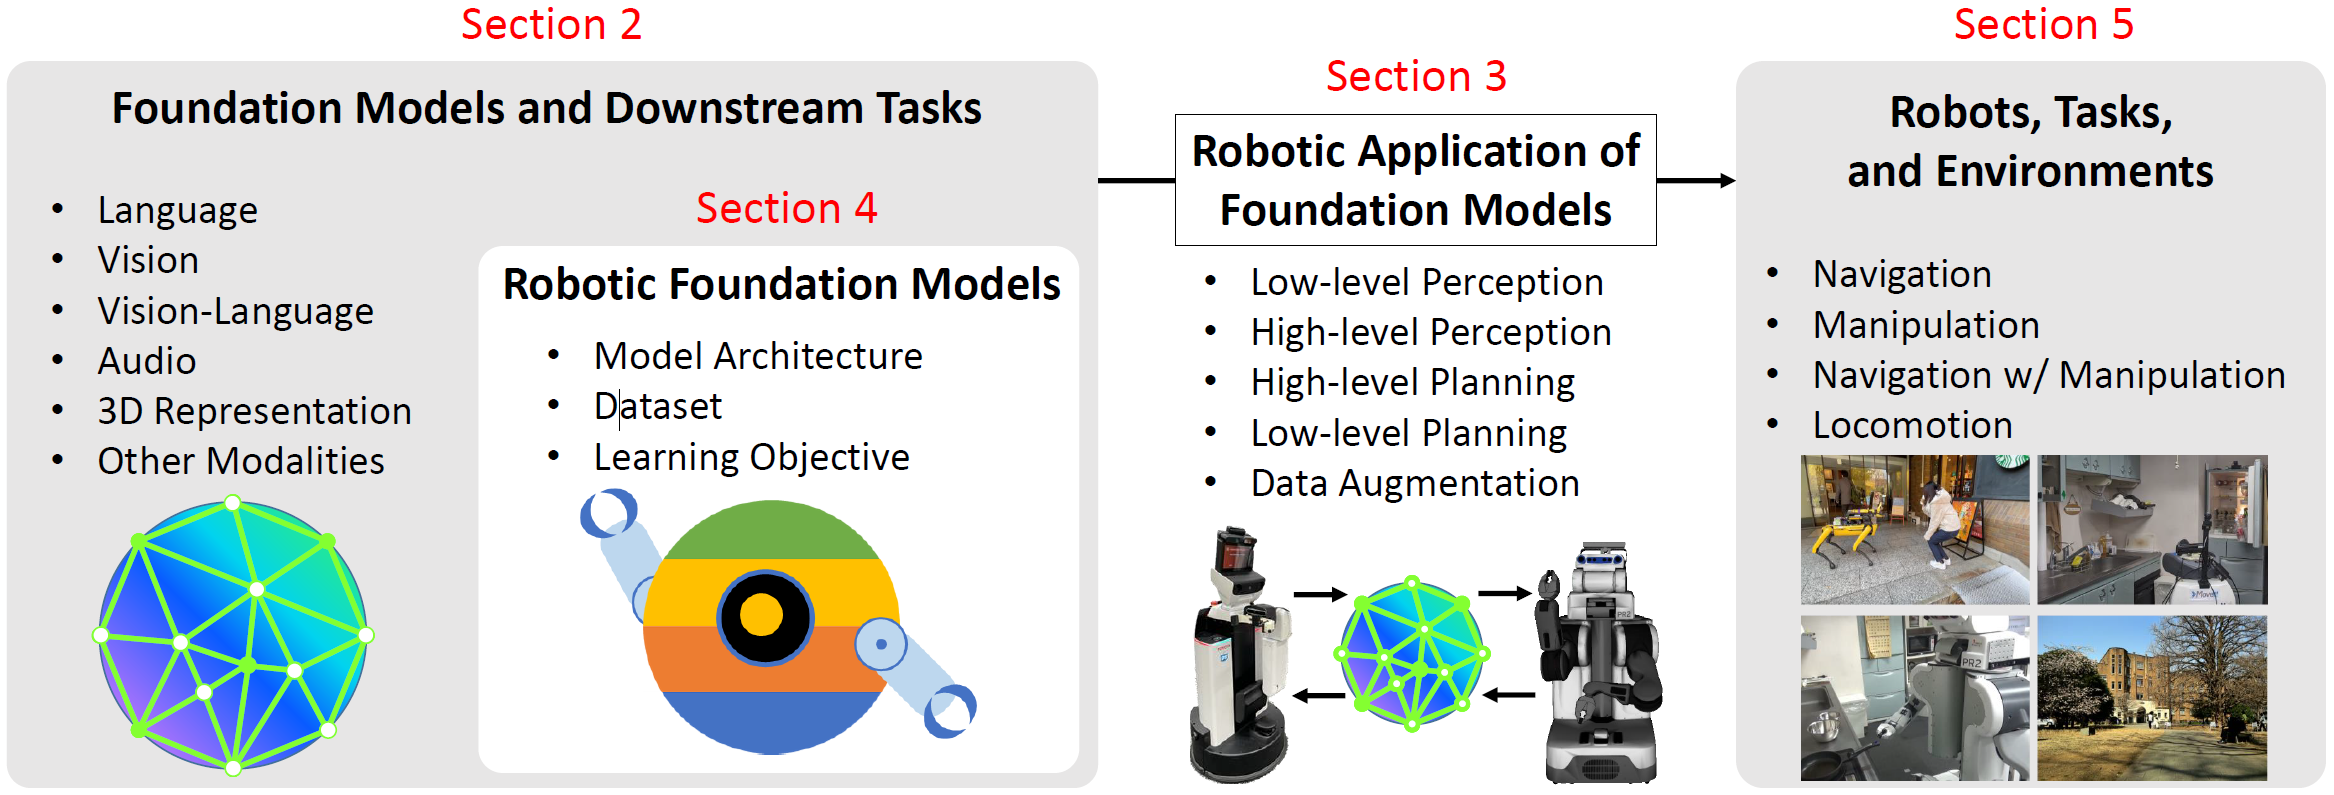
<!-- Figure 1. The structure of this study. In section 2, we overview the characteristics of foundation models and introduce common downstream tasks. In section 3, we categorize studies of applications of foundation models in robotics. In section 4, we introduce prior work on creating foundation models for robotics, so-called robotic foundation models. In section 5, we overview robots, tasks, and environments used for applications of foundation models in robotics. -->
图1. 本文的结构。在第2节中，我们概述了基础模型的特征, 并介绍了常见的下游任务。在第3节中, 我们对机器人中基础模型的应用研究进行了分类。在第4节中, 我们介绍了构建机器人基础模型的先前工作, 即所谓的机器人基础模型。在第5节中, 我们概述了机器人中基础模型应用所使用的机器人、任务和环境。

# Foundation Models
<!-- The term foundation model was first introduced in [25]. In this survey, we will simply describe the types of foundation models used in robotic applications, as well as downstream tasks, deferring to [25] for a discussion of foundation models themselves. -->
术语基础模型首次在[25]中引入。在本次调研中, 我们将简单介绍(机器人应用中使用的)基础模型的类型以及下游任务, 并遵从[25]对基础模型本身的讨论。

<!-- In 2012, deep learning gained mainstream attention from the machine learning community with the winning model from the ILSVRC-2012 competition [43]. In 2017, the Transformer model was introduced by [44], leading to significant advancements in the fields of natural language processing (NLP) [45] and computer vision [46]. In 2021, a model that has been trained on a large amount of data and can be easily applied to a wide range of downstream tasks has come to be referred to as a "foundation model" [25]. Foundation models are characterized by three main characteristics:
- In-context learning
- Scaling law
- Homogenization -->
2012年, 深度学习凭借ILSVRC-2012竞赛的获胜模型, 获得机器学习社区的主流关注[43]。2017年, [44]提出了Transformer模型, 导致自然语言处理(NLP)[45]和计算机视觉[46]领域的重大进步。2021年, 经过大量数据训练并且可以轻松应用于各种下游任务的模型被称为"基础模型"[25]。基础模型具有三个主要特征:  
- 上下文学习
- 规模化定律
- 同质化

<!-- In-context learning enables the accomplishment of new tasks with just a few examples, without the need for retraining or fine-tuning. Scaling laws allow for continued performance improvements as data, computational resources, and model sizes are increased. Homogenization allows for certain foundation model architectures to handle diverse modalities in a unified manner. -->
上下文学习只需几个示例即可完成新任务, 无需重新训练或微调。随着数据、计算资源和模型大小的增加, 规模化定律允许持续的性能改进。同质化允许某些基础模型架构以统一的方式处理不同的模态。

<!-- In this chapter, we classify foundation models from the perspective of their applicability in robotics. The most critical criterion for robots to leverage foundation models is the choice of which modalities to use. This chapter discusses the types of foundation models and the downstream tasks that they can perform from the perspectives of language, vision, audio, 3D representation, and various other modalities. In the context of utilizing each modality, we further classify foundation models from the perspective of network inputs and outputs. The overview is shown in Figure 2. Note that we do not aim to comprehensively cover foundation models here; our focus remains on addressing differences in modalities and classification of foundation models. -->
在本节中, 我们从基础模型在机器人中的适用性角度对其进行分类。机器人利用基础模型的最关键准则是选择使用哪种模态。本节从语言、视觉、音频、3D表示和各种其他模态的角度, 讨论基础模型的类型以及它们可以执行的下游任务。在利用每种模态的上下文中, 我们从网络输入和输出的角度, 进一步对基础模型进行分类。概述如[图2](#fig.2)所示。请注意, 我们的目的并不是在这里全面覆盖基础模型；我们的重点仍然是阐述模态间的差异, 和基础模型的分类。

<span id='fig.2'></span>
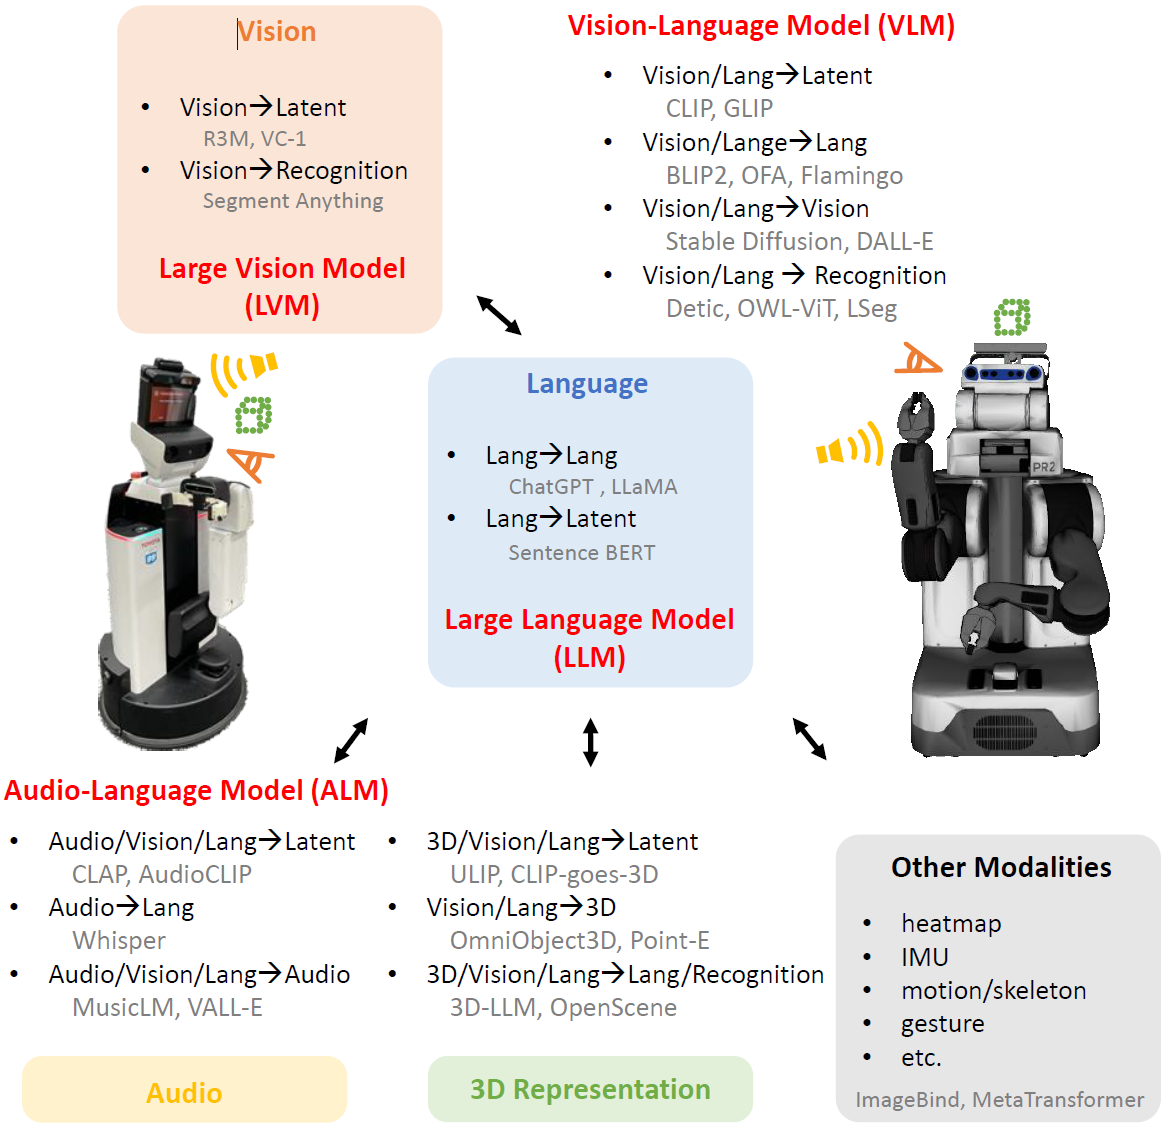

## Foundation Models for Language
<!-- Large Language Models (LLMs) often refer to large deep neural networks trained on vast amounts of data. From the viewpoint of large deep neural networks, Transformers are common architectures for recent LLMs, which may refer to decoder-only autoregressive architectures that consist of multiple Transformer blocks trained to predict the next token. In terms of the data, the datasets for training LLMs are Internet-scale; for example, the pre-training of GPT-3 [47] uses CommonCrawl covering Internet data from years 2016 to 2019, which amounts to 45TB of compressed plain text and 410 billion tokens after filtering. Codex [48] leverages substantial code data from the snapshot of 54 million public software repositories hosted on GitHub in May 2020 to enable code-writing capabilities with LLMs. LLMs are the basis of recent foundation models, which can generalize to diverse domains and combine multiple types of data. The network input and output of LLMs primarily fall into two categories: -->
大语言模型(Large Language Models, LLM)通常指经过大量数据训练的大型深度神经网络。从大型深度神经网络的角度, Transformer是最新大语言模型的常见架构, 这可能指的是仅解码器自回归架构, 该架构由多个经过训练的 Transformer 块组成, 以预测下一个词元。数据方面, 训练LLMs的数据集是互联网规模; 例如, GPT-3[47]的预训练使用CommonCrawl, 涵盖2016年至2019年的互联网数据, 过滤后总计45TB的压缩纯文本和4100亿个词元。Codex [48] 利用 2020 年 5 月 GitHub 上托管的 5400 万个公共软件库快照中的丰富代码数据, 用大语言模型实现代码编写能力。大语言模型是最新基础模型的基础, 它可以推广到不同领域并结合多种类型的数据。大语言模型的网络输入和输出主要分为两类：

- Language $\to$ Language
- Language $\to$ Latent

<!-- Regarding Language $\to$ Language, various LLMs have been developed, including GPT-3 [35], LLaMA [40,49], and others. These models can be prompted in order to induce Chain of Thought (CoT) [50,51] which allows them to achieve more complex inference capabilities by going through intermediate reasoning steps while solving a problem. Furthermore, this language is not limited to natural language but can also handle various formats such as program code, markup languages (e.g., HTML, XML), and data structures (e.g., JSON, YAML) [48]. In-context learning can also lead to a significant improvement in its performance through the use of examples presented in a few-shot manner. -->
关于Language $\to$ Language, 已经开发了各种大语言模型, 包括 GPT-3 [35]、LLaMA [40, 49] 等。<font color="red">这些模型可以被提示</font>(prompted)<font color="red">以引发思维链(Chain of Thought, CoT)[50, 51], 思维链使得大语言模型能够在解决问题时, 通过中间推理步骤, 实现更复杂的推理能力</font>。此外, 这种语言不仅限于自然语言, 还可以处理各种格式, 例如程序代码、标记语言(例如, HTML、XML)和数据结构(例如, JSON、YAML)[48]。通过使用以少量的方式呈现的示例, 上下文学习还可以显着提高其性能。

<!-- As for Language $\to$ Latent, models like Sentence-BERT [52] have been developed that can transform language into latent space vectors. Also, one can obtain latent space vectors from large language models which can perform Language $\to$ Language conversions, by extracting features from intermediate layers. By projecting into the latent space, it becomes possible to measure the distance between two sentences, enabling one to extract similar sentences for tasks such as retrieval. -->
至于Language $\to$ Latent, 已经开发了像Sentence-BERT[52]这样的模型, 它可以将语言转换为潜在空间向量。我们也可以从大型语言模型中获取潜在空间向量, 通过从中间层提取特征, 执行Language $\to$ Language转换。通过投影到潜在空间, 可以测量两个句子之间的距离, 从而能够提取相似的句子以执行检索等任务。

## Foundation Models for Vision

<!-- The foundation models for images, Large Vision Models (LVM), can mainly be divided into two types based on network input and output: -->
图像的基础模型, 大视觉模型(Large Vision Models, LVM), 根据网络输入和输出主要可以分为两类:

- Vision $\to$ Latent
- Vision $\to$ Recognition

<!-- Regarding Vision $\to$ Latent, various techniques have been developed to project images from diverse situations into some latent space. Representative examples include R3M [3] and VC-1 [53]. These methods are designed to transform image information from various data sources into lower-dimensional vectors, which can be considered as feature extraction of high-level representations. -->
关于 Vision $\to$ Latent，已经开发了各种技术将不同情况下的图像投影到某些潜在空间。代表性的例子包括 R3M [3] 和 VC-1 [53]。这些方法旨在将来自各种数据源的图像信息转换为低维向量, 这可以被视为高层表示的特征提取。

<!-- As for Vision $\to$ Recognition, in this context, Recognition refers to performing tasks such as semantic segmentation, instance segmentation, and bounding box extraction on images. Typically, recognition is based on language labels, and there are not many foundation models that perform these recognitions solely based on image information. Among them, Segment Anything [54] is a model specialized in image segmentation, capable of segmenting not only the entire image but also specific areas specified by points or boxes. More advanced applications like Tracking Anything [55] and Faster Segment Anything [56] have also been developed. -->
至于Vision $\to$ Recognition, 在这种情况下, 识别是指对图像执行语义分割、实例分割和边界框提取等任务。通常, 识别基于语言标签, 并且仅基于图像信息, 执行这些识别的基础模型并不多。其中, Segment Anything [54]是专门用于图像分割的模型, 不仅能够分割整个图像, 而且能够分割由点或框指定的特定区域。还开发了更高级的应用程序, 例如 Tracking Anything [55] 和 Faster Segment Anything [56]。

<!-- Of course, some models perform Vision $\to$ Vision or Latent $\to$ Vision tasks. To effectively utilize these models as foundation models for various tasks, however, conditioning on language is often essential. Therefore, in the following section on Vision and Language, we will introduce examples of such models. -->
当然, 有些模型执行 Vision $\to$ Vision 或 Latent $\to$ Vision 任务。然而, 为了有效地利用这些模型作为各种任务的基础模型, 对语言的调节通常是必不可少的。因此, 在接下来的视觉和语言部分, 我们将介绍此类模型的示例。

## Foundation Models for Vision and Language

<!-- While individual language or image processing has limited capabilities, combining vision and language allows us to build diverse foundation models. These Vision-Language Models (VLMs) are trained with the Internet-scale massive datasets as well as LLMs. For instance, CLIP [28] is trained on 400 million image-text pair datasets from the Internet. When classifying VLMs from the network input and output, they mainly fall into the following four categories. -->
尽管单个语言或图像处理的能力有限, 但是将视觉和语言结合起来使我们能够构建多样化的基础模型。这些视觉语言模型(Vision-Language Models, VLM)使用互联网规模的海量数据集和大语言模型进行训练。例如, CLIP [28] 使用来自互联网的( 4 亿个图像文本对)数据集进行训练。从网络输入和输出对VLMs进行分类时, 主要分为以下四类:

- Vision + Language $\to$ Latent
- Vision + Language $\to$ Language
- Vision + Language $\to$ Vision
- Vision + Language $\to$ Recognition

<!-- Vision + Language $\to$ Latent involves converting images and text into latent space vectors, which allows one to calculate the similarity between them for downstream tasks such as retrieval. Prominent models include CLIP [28] and GLIP [57]. While CLIP [28] computes correspondences between a single image-text pair, GLIP [57] can calculate correspondences between multiple regions of an image with their text descriptions. -->
Vision + Language $\to$ Latent 涉及将图像和文本转换为潜在空间向量, 这可以计算它们之间的相似度以进行检索等下游任务。著名的模型包括 CLIP [28] 和 GLIP [57]。<font color="red">CLIP [28] 计算单个图像-文本对之间的对应关系，而 GLIP [57] 可以计算图像的多个区域与其文本描述之间的对应关系</font>。

<!-- Vision + Language $\to$ Language enables tasks like image captioning (IC), visual question answering (VQA), and visual entailment (VE). Prominent models include BLIP2 [58], Flamingo [59], OFA [60], and Unified-IO [61]. BLIP2 is dedicated to VQA, whereas OFA and Unified-IO serve as a foundation model capable of VQA, IC, Visual Grounding (VG), Text-to-Image Generation (TIG), and more within a single network. Flamingo supports in-context learning for both vision and language. -->
Vision + Language $\to$ Language可实现图像字幕 (IC)、视觉问答 (VQA) 和视觉蕴涵 (VE) 等任务。著名的模型包括 BLIP2 [58]、Flamingo [59]、OFA [60] 和 Unified-IO [61]。<font color="red">BLIP2 专用于 VQA, 而 OFA 和 Unified-IO 作为基础模型, 能够在单个网络中实现 VQA、IC、Visual Grounding (VG)、文本到图像生成 (TIG) 等。Flamingo 支持视觉和语言的上下文学习</font>。

<!-- Vision + Language $\to$ Vision facilitates tasks like image editing and image generation through language. Prominent models include Stable Diffusion [62], DALLE [63], and the previously mentioned OFA [60] and Unified-IO [61]. They incorporate Transformer-based architectures and diffusion architectures into the models. -->
Vision + Language $\to$ Vision通过语言服务图像编辑和图像生成等任务。著名的模型包括<font color="red"> Stable Diffusion [62]、DALLE [63]以及前面提到的 OFA [60]和 Unified-IO [61]</font>。他们将基于 Transformer 的架构和扩散架构整合到模型中。

<!-- Vision + Language $\to$ Recognition enables tasks like semantic segmentation, instance segmentation, and bounding box extraction from images and language. Prominent models include Detic [64], OWL-ViT [65], LSeg [66], and DinoV2 [67], which excel in open-vocabulary recognition compared to previous methods like SSD [68] or YOLO [69]. -->
Vision + Language $\to$ Recognition可实现语义分割、实例分割以及从图像和语言中提取边框等任务。著名的模型包括<font color="red"> Detic [64]、OWL-ViT [65]、LSeg [66] 和 DinoV2 [67]</font>, 与 SSD [68] 或 YOLO [69] 等传统方法相比, 它们在开放词汇识别方面表现出色。

<!-- The Vision category encompasses not only images but also videos. Some approaches involve inputting videos frame by frame into these models and integrating the results, while others like XCLIP [70] and StableVideo [71] directly accept videos as input or produce video outputs. -->
视觉类别不仅包括图像，还包括视频。一些方法涉及将视频逐帧输入到这些模型中并集成结果，而<font color="red"> XCLIP [70] 和 StableVideo [71] 等其他方法则直接接受视频作为输入或产生视频输出</font>。

## Foundation Models for Audio

<!-- By incorporating auditory input into an existing Vision-Language Model, it becomes possible to tackle a wider range of tasks. These Audio-Language Models (ALMs) can be categorized as follows based on network input and output. -->
通过将音频输入整合到现有的视觉语言模型中, 可以处理更广泛的任务。这些音频语言模型(Audio-Language Models, ALM)根据网络输入和输出分类如下:

- Audio + Vision + Language $\to$ Latent
- Audio + Language $\to$ Language
- Audio + Vision + Language $\to$ Audio

<!-- Audio + Vision + Language $\to$ Latent does not only represent the correspondence between images and language like in CLIP and GLIP, but also encodes sound into latent space vectors, enabling similarity calculations. Prominent models developed for this purpose include CLAP [72] and AudioCLIP [73]. -->
Audio + Vision + Language $\to$ Latent 不仅表示(像 CLIP 和 GLIP 的)图像和语言之间的对应关系, 而且还将声音编码到潜在空间向量中, 从而实现相似性计算。为此目的开发的著名模型包括 CLAP [72] 和 AudioCLIP [73]。

<!-- Audio + Language $\to$ Language primarily enables Speech-to-Text recognition. Representative models in this category include Whisper [74]. With Whisper [74], it is possible to specify easily confused words and perform in-context learning. -->
Audio + Language $\to$ Language主要支持语音转文本识别。该类代表性模型包括 Whisper [74]。使用 Whisper [74]，可以辨析易混淆的单词并执行上下文学习。

<!-- Audio + Vision + Language $\to$ Audio mainly facilitates Text-to-Speech and audio conversion. Prominent models in this domain include MusicLM [75] and VALLE [76]. -->
Audio + Vision + Language $\to$ Audio 主要服务文本到语音及音频转换。该领域的著名模型包括 MusicLM [75] 和 VALLE [76]。

## Foundation Models for 3D Representation

<!-- Currently, research incorporating 3D representations such as point clouds and 3D meshes as modalities is on the rise. 3D representations are essential for robot operations. Classifying these from network input and output can be summarized as follows: -->
目前, 将点云和 3D 网格等 3D 表示形式纳入模态的研究正在兴起。3D 表示对于机器人操作至关重要。从网络输入和输出对它们进行分类可以总结如下:

- 3D Representation + Vision + Language $\to$ Latent
- Vision + Language $\to$ 3D Representation
- 3D Representation + Vision + Language $\to$ Recognition

<!-- 3D Representation + Vision + Language $\to$ Latent enables the transformation of 3D representations into latent space vectors, and therefore allows for similarity calculations between latent vectors, like in previous models like CLIP and CLAP. Representative models in this category include ULIP [77] and CLIP-goes-3D [78]. It allows for tasks such as classifying objects of interest based on their 3D shapes, images, or language and using them as features for policy learning. -->
3D Representation + Vision + Language $\to$ Latent 可实现 3D 表示到潜在空间向量的转换, 因此允许潜在向量之间的相似性计算, 就像之前的模型(如 CLIP 和 CLAP)一样。该类代表性模型包括<font color="red"> ULIP [77] 和 CLIP-goes-3D [78]</font>。它允许根据 3D 形状、图像或语言对感兴趣的对象进行分类, 并将它们用作策略学习的特征等任务。

<!-- Vision + Language $\to$ 3D Representation outputs the 3D shapes of objects represented as Point Clouds or 3D Meshes based on images or language input. Prominent models in this category include OmniObject3D [79] and Point-E [80]. These can be useful for tasks like comparing the shape of manipulated objects to reality or viewing them from different angles. -->
Vision + Language $\to$ 3D Representation基于图像或语言输入, 输出(点云或 3D 网格形式的)物体的 3D 形状。此类著名模型包括<font color="red"> OmniObject3D [79] 和 Point-E [80]</font>。这些模型对于(将操控对象的形状与现实进行比较, 或从不同角度观察它们等)任务很有用。

<!-- 3D Representation + Vision + Language $\to$ Recognition enables tasks such as segmentation and bounding box extraction in 3D space through language, similar to previous approaches. Representative algorithms include 3D-LLM [81], OpenScene [82], and SpatialVLM [83], which combine 3D representations with LLMs. -->
3D Representation + Vision + Language $\to$ Recognition可实现(通过语言在 3D 空间中进行分割和边界框提取等)任务, 类似于之前的方法。代表性算法包括<font color="red"> 3D-LLM [81]、OpenScene [82] 和 SpatialVLM [83]</font>，它们将 3D 表示与大语言模型相结合。

## Foundation Models for Other Modalities
<!-- Up until now, we have discussed language, vision, audio, and 3D representations, but in reality it is possible to use various types of sensors. Such sensors include IMUs, heatmaps, object poses, and skeletal movements including gestures. Notable models in this regard include ImageBind [84] and Meta-Transformer [85]. These methods, like CLIP, CLAP, and ULIP, enable similarity calculations, but they simultaneously handle a significantly larger number of modalities. In addition, FoundationPose [86] is a unified foundation model for 6D object pose estimation and tracking, supporting both model-based and model-free setups. There are numerous techniques for dealing with gestures and skeletal movements, such as Human Motion Diffusion Model [87], T2M-GPT [88], and GestureDiffCLIP [89], which generate human motion or gesture through spoken language. -->
到目前为止, 我们已经讨论了语言、视觉、音频和 3D 表示, 但现实中可以使用各种类型的传感器。这些传感器包括 IMU、热图、物体位姿和骨骼运动(包括手势)。这方面的著名模型包括<font color="red"> ImageBind [84] 和 Meta-Transformer [85]</font>。这些方法(像 CLIP、CLAP 和 ULIP一样)能够进行相似性计算, 但它们同时处理数量明显更多的模态。此外, <font color="red">FoundationPose [86] 是用于 6D 物体位姿估计和跟踪的统一基础模型, 支持基于模型和无模型设置。有许多技术可以处理手势和骨骼运动, 例如 Human Motion Diffusion Model [87]、T2M-GPT [88] 和 GestureDiffCLIP [89], 它们通过口语生成人体运动或手势。</font>

<!-- Finally, it is important to note that there are many models with slightly different input and output configurations beyond what we have discussed here. By determining which modalities are being utilized and what tasks are possible, we can anticipate future application of these models in real-world robotics. -->
最后, 值得注意的是, 有许多模型的输入和输出配置略有不同, 超出了我们在此讨论的范围。通过确定正在使用哪些模式以及可能执行哪些任务, 我们可以预测这些模型在现实世界机器人中的未来应用。

# Applications of Foundation Models to Robotics
<!-- In general, the behavior of robots is composed of perception, planning, and control. In this study, we divide perception into two categories: low-level and high-level. Also, we refer to planning and control as high-level planning and low-level planning, respectively. With the addition of data augmentation for learning these components, we categorize the utilization of foundation models for robots into the following five categories. -->
一般来说, 机器人的行为由感知、规划和控制组成。在本研究中, 我们将感知分为两类: 低层感知和高层感知。同时, 我们将规划和控制分别称为高层规划和低层规划。通过添加数据增强来学习这些组件, 我们将机器人基础模型的使用分为以下五类。

- low-level perception
- high-level perception
- high-level planning
- low-level planning
- data augmentation

<!-- The relationship between these categories is shown in Figure 3. Foundation models for low-level perception include semantic segmentation and bounding box extraction in images or 3D representations, and feature extraction in various modalities. Foundation models for high-level perception involve the transformation and utilization of results obtained from low-level perception into forms such as maps, rewards, and motion constraints. Foundation models for high-level planning execute higher-level abstract task planning, excluding direct control. Foundation models for low-level planning execute lower-level motion control, including joint and end effector control. Foundation models for data augmentation enhance robustness through data augmentation when executing learning that connects low-level perception and low-level planning. -->
这些类别之间的关系如[图3](#fig.3)所示。低层感知的基础模型包括图像或 3D 表示中的语义分割和边框提取, 以及各种模态的特征提取。高层感知的基础模型涉及将(从低层感知获得的)结果转换和利用为(地图、奖励和运动约束等)形式。高层规划的基础模型执行高层抽象任务规划，不包括直接控制。低层规划的基础模型执行低层运动控制, 包括关节和末端执行器控制。数据增强的基础模型在执行连接低层感知和低层规划的学习时, 通过数据增强增强鲁棒性。

<span id='fig.3'></span>
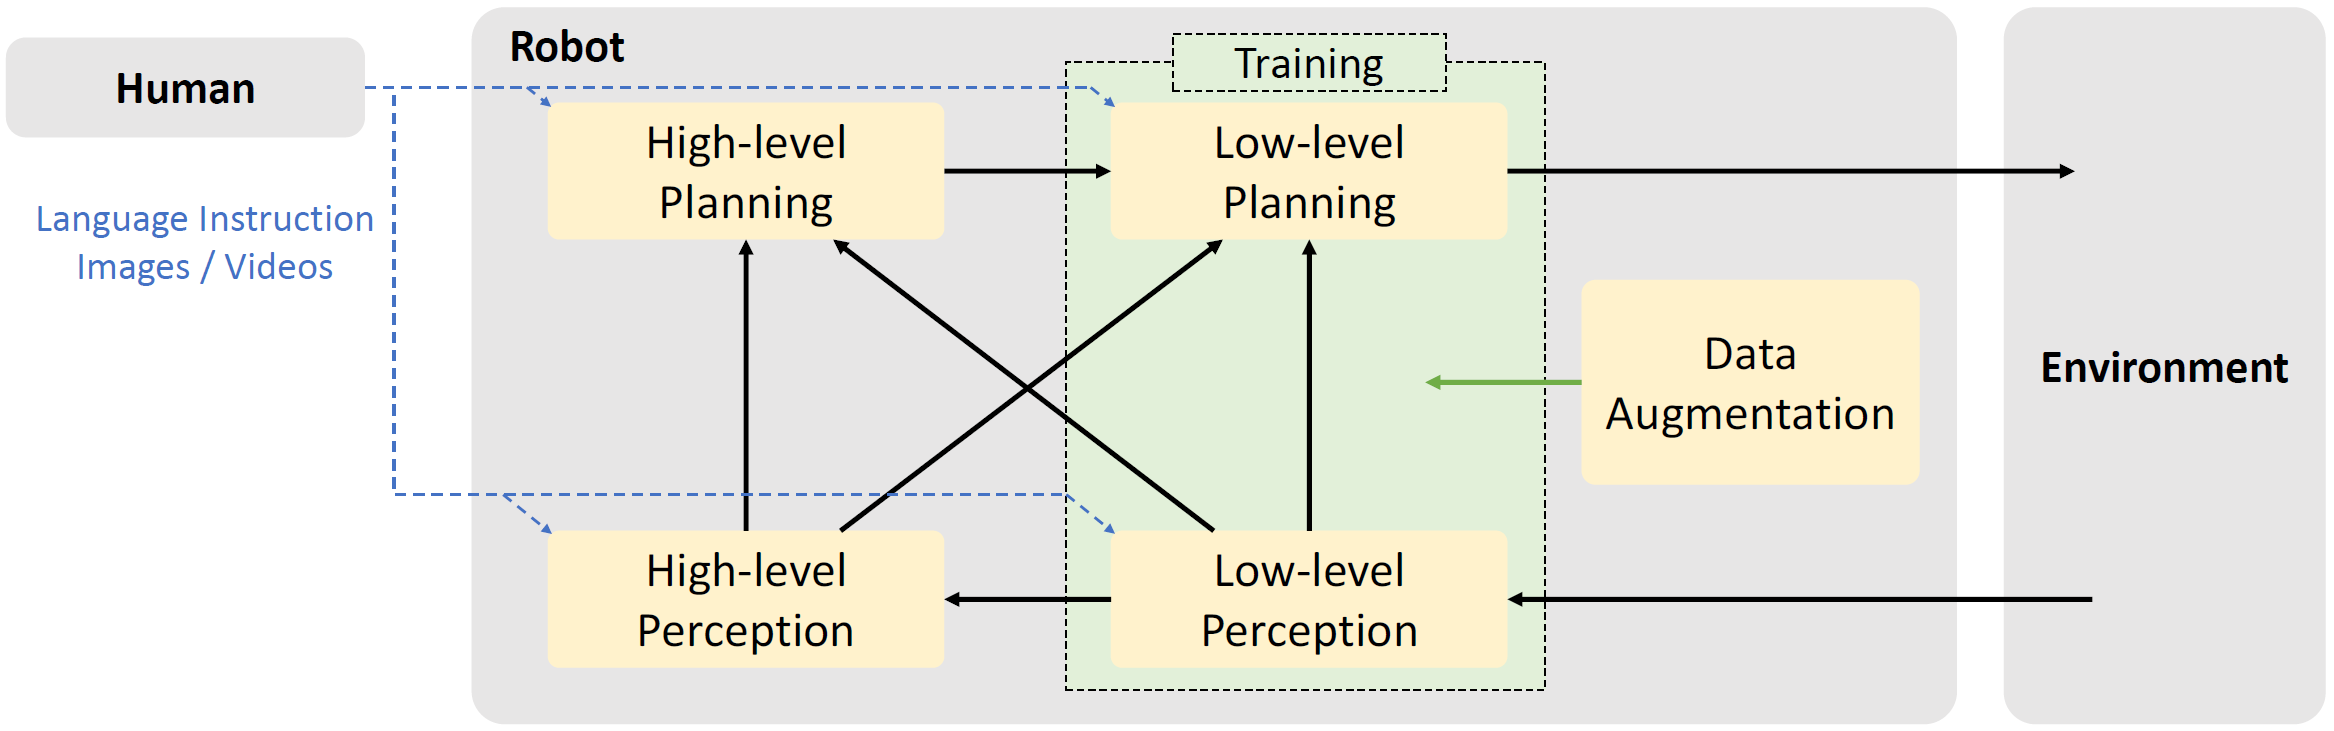
<!-- Figure 3. The overview of utilization of foundation models for robots. With foundation models, low-level perception conducts feature extraction or scene recognition, high-level perception conducts reward generation or map construction, high-level planning conducts task planning or code generation, low-level planning conducts footstep generation or command generation, and data augmentation conducts image augmentation or instruction augmentation. -->
图 3. 机器人基础模型的使用概述。借助基础模型, 低层感知进行特征提取或场景识别, 高层感知进行奖励生成或地图构建, 高层规划进行任务规划或代码生成, 低层规划进行轨迹生成或命令生成, 数据增强进行图像增强或指令增强。

<!-- In practice, various applications are created by combining these five utilization methods. They are mainly categorized into four types as shown in Figure 4.
1. Performing low-level perception and then planning behaviors with high-level planning.
2. Extracting rewards and motion constraints through low-level perception and high-level perception, and using them for reinforcement learning and trajectory optimization.
3. Generating maps, scene graphs, and more through low-level perception and highlevel perception, and using them as a basis for task planning.
4. Robustly conducting end-to-end learning that directly correlates feature extraction from low-level perception and control inputs, using data augmentation. -->
在实际应用中, 通过这五种使用方法的结合, 可以创造出各种应用。它们主要分为四种类型, 如[图4](#fig.4)所示。
1. 执行低层感知, 然后用高层规划来规划行为。
2. 通过低层感知和高层感知提取奖励和运动约束, 并将其用于强化学习和轨迹优化。
3. 通过低层感知和高层感知生成地图、场景图等, 并将其作为任务规划的基础。
4. 使用数据增强, 稳健地进行端到端学习, 直接将从低层感知的特征提取和控制输入进行关联。

<span id='fig.4'></span>
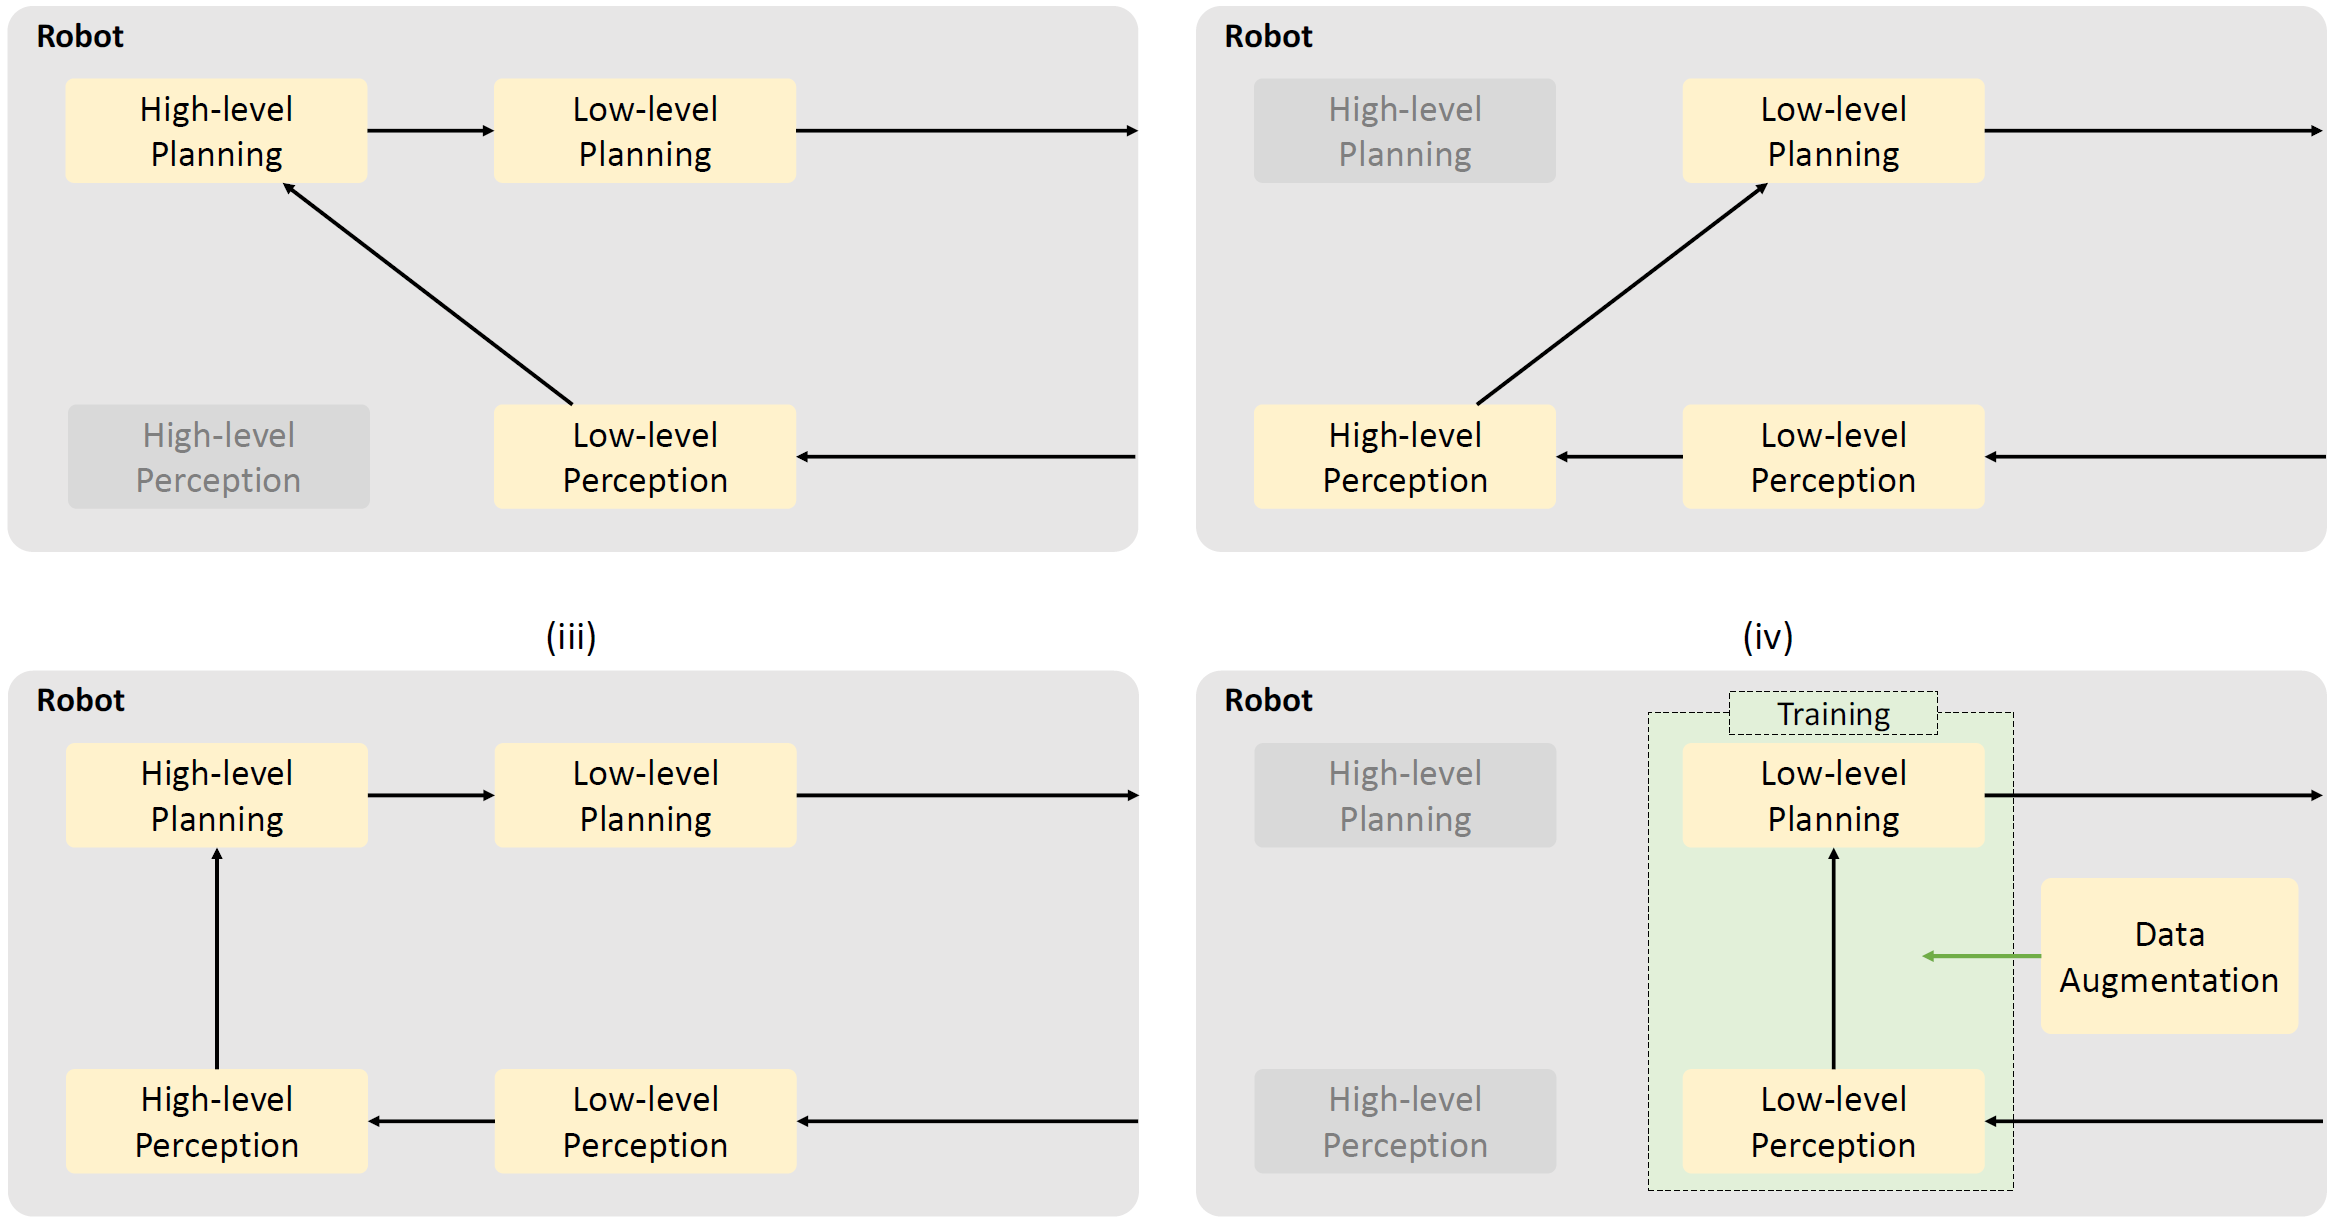
<!-- Figure 4. The four types of combinations of low-level perception, high-level perception, high-level planning, low-level planning, and data augmentation with foundation models. -->
图4. 借助基础模型, 低层感知、高层感知、高层规划、低层规划和数据增强的四种组合。

<!-- It is important to note that there are also research approaches that do not fit within this framework. -->
值得注意的是, 还有一些研究方法不适合这个框架。

<!-- From these perspectives, we select several representative papers and summarize them in Table 1. The details are discussed subsequently. -->
从这些角度出发, 我们选择了几篇有代表性的论文并将其总结在[表1](#table.1)中。细节将在随后讨论。

<!-- Table 1. Representative studies utilizing foundation models for low-level perception, high-level perception, high-level planning, low-level planning, and data augmentation. -->
表 1. <span id='table.1'></span> 对于低层感知、高层感知、高层规划、低层规划和数据增强, 使用基础模型的代表性研究。
Papers | Low-level perception | High-level perception | High-level planning | Low-level planning | Data augmentation
:- | :-: | :-: | :-: | :-: | :-:
CLIPort [90]<br>REFLECT [91] | feature extraction<br>scene recognition | | -<br>task planning
VoxPoser [94]<br>CLIP-Fields [95] | scene recognition<br>feature extraction | objective design<br>map construction | task planning<br>-
Tidy-Bot [18]<br>Code as Policies [5] | scene recognition<br>scene recognition | | task planning<br>code generation
SayTap [98]<br>General Pattern [99] | | | | footstep generation<br>command generation
GenAug [100]<br> | | | | | image augmentation<br>instruction augmentation

<!-- **Low-level Perception**: Representative studies utilizing foundation models for lowlevel perception include CLIPort [90] and REFLECT [91]. CLIPort utilizes the semantic information extracted by CLIP’s image and text encoder [28] along with spatial information extracted by Transporter Networks [92] to output pick and place positions, serving as an example of using foundation models for feature extraction in low-level perception. REFLECT combines object detection by MDETR [93], object state recognition by CLIP, scene graph description using depth images and heuristics, sound recognition by AudioCLIP [73], and a summary of the cause of robot failures along with corrective task plans generated by an LLM, serving as an example of using foundation models for scene recognition including explicit object recognition and sound recognition. CLIPort falls under category (iv), and REFLECT falls under category (i) in Figure 4. -->
**低层感知**: 利用基础模型进行低层感知的代表性研究包括 CLIPort [90] 和 REFLECT [91]。<font color="red">**CLIPort**利用CLIP的图像和文本编码器[28]提取的语义信息以及Transporter Networks[92]提取的空间信息, 输出拾取和放置位置</font>, 作为在低层感知中使用基础模型进行特征提取的示例。<font color="red">**REFLECT** 集成 MDETR [93] 的对象检测、CLIP 的物体状态识别、使用深度图像和启发式的场景图描述、AudioCLIP [73] 的声音识别, 机器人故障原因总结, 以及由一个大语言模型生成的纠正任务计划</font>, 作为使用基础模型进行场景识别(包括精确的物体识别和声音识别)的示例。在[图4](#fig.4)中, CLIPort 属于类别 (iv), REFLECT 属于类别 (i)。

<!-- **High-level Perception**: Representative studies utilizing foundation models for high-level perception include VoxPoser [94] and CLIP-Fields [95]. VoxPoser uses an LLM and a VLM to generate affordance maps and constraint maps as programs, and based on these maps, it performs model predictive control, serving as an example of using foundation models for objective function generation and constraint design. A similar case is using LLM or VLM for reward design in reinforcement learning, such as with Eureka [96]. CLIP-Fields utilizes Detic [64], CLIP [28], and Sentence-BERT [52] to embed object labels and object image features for each point cloud in space, enabling navigation, serving as an example of using foundation models for map construction. VoxPoser falls under category (ii), and CLIP-Fields falls under category (iii) in Figure 4. -->
**高层感知**: 利用基础模型进行高层感知的代表性研究包括 VoxPoser [94] 和 CLIP-Fields [95]。<font color="red">**VoxPoser**使用一个LLM和VLM作为程序生成 affordance 图和约束图, 并基于这些图执行模型预测控制</font>, 作为使用基础模型进行目标函数生成和约束设计的示例。相似案例是在强化学习中使用 LLM 或 VLM 进行奖励设计, 例如 Eureka [96]。<font color="red">**CLIP-Fields** 利用 Detic [64]、CLIP [28] 和 Sentence-BERT [52] 为空间中的每个点云嵌入对象标签和对象图像特征, 从而实现导航</font>, 作为使用基础模型进行地图构建的示例。在[图4](#fig.4)中, VoxPoser 属于类别 (ii), CLIP-Fields 属于类别 (iii)。

<!-- **High-level Planning**: Representative studies utilizing foundation models for highlevel planning include TidyBot [18] and Code as Policies [5]. TidyBot performs object recognition using ViLD [97] and object classification using CLIP [28]. It then infers where to place those objects, considering learned human preferences in conjunction with an LLM, serving as an example of using foundation models for task planning. Code as Policies generates Python code for pre-defined robot control recognition APIs and control APIs via an LLM, serving as an example of using foundation models for code generation. Both of these cases fall under category (i) in Figure 4. -->
**高层规划**: 利用基础模型进行高层规划的代表性研究包括 TidyBot [18] 和 Code as Policies [5]。<font color="red">**TidyBot**</font> 使用 ViLD [97] 执行对象识别, 并使用 CLIP [28] 执行对象分类。然后, <font color="red">它考虑学到的人类偏好, 结合一个大语言模型, 推断这些物体的放置位置</font>, 作为使用基础模型进行任务规划的示例。Code as Policies 通过一个LLM 为预定义的机器人控制识别 API 和控制 API 生成 Python 代码, 作为使用基础模型进行代码生成的示例。这两个案例都属于[图4](#fig.4)中的类别 (i)。

<!-- **Low-level Planning**: Representative studies utilizing foundation models for lowlevel planning include SayTap [98] and General Pattern Machines [99]. SayTap uses an LLM to output footstep plans and velocity using in-context learning, and then performs reinforcement learning through simulation to obtain joint commands that fulfill these plans, serving as an example of using foundation models for footstep generation. General Pattern Machines utilizes an LLM as a sequence generator for sequence transformation, completion, and improvement, and is used for reinforcement learning in tasks like Cartpole and action completion in manipulation, serving as an example of using foundation models for direct command generation. Both of these cases fall under category (i) in Figure 4, which consists solely of a low-level planner that does not involve perception. -->
**低层规划**: 利用基础模型进行低层规划的代表性研究包括 SayTap [98] 和 General Pattern Machines [99]。<font color="red">**SayTap**使用一个LLM通过上下文学习输出轨迹规划和速度, 然后通过模拟进行强化学习, 以获得满足这些规划的关节命令</font>, 作为使用基础模型进行轨迹生成的示例。General Pattern Machines 利用一个 LLM 作为序列生成器, 进行序列转换、完成和改进, 并用于(Cartpole 和操作中的动作完成等)任务中的强化学习, 作为使用基础模型进行直接命令生成的示例。这两个案例都属于[图4](#fig.4)中的类别 (i), 仅由不涉及感知的低层规划器组成。

<!-- **Data Augmentation**: Representative studies utilizing foundation models for data augmentation include GenAug [100] and DIAL [101]. GenAug extensively augments images using diffusion models [62] by changing backgrounds, adding distractors, altering object textures, and repositioning different objects to improve the robustness of imitation learning, serving as an example of using foundation models for image data augmentation. DIAL obtains a large number of language instruction examples through LLM and crowdsourcing, fine-tunes CLIP [28] on a large dataset of trajectory data, and extracts multiple appropriate language instructions for imitation learning, serving as an example of using foundation models for instruction augmentation. Both of these cases fall under category (iv) in Figure 4. -->
**数据增强**: 利用基础模型进行数据增强的代表性研究包括 GenAug [100] 和 DIAL [101]。GenAug 使用扩散模型[62], 通过改变背景、添加干扰物、变更对象纹理和重新定位不同对象来大量增强图像, 以提高模仿学习的鲁棒性, 作为使用基础模型进行图像数据增强的示例。DIAL在大型轨迹数据集上, 通过LLM和众包的微调CLIP[28], 获得大量语言指令例子, 并提取多种合适的语言指令进行模仿学习, 作为使用基础模型进行指令增强的示例。这两个案例都属于[图4](#fig.4)中的类别 (iv)。

<!-- On the other hand, there has been research aiming at creating foundation models for robots that encompass these frameworks, including perception and planning, so-called Robotic Foundation Models. We will provide more details on these in [section 4](#Progress-towards-Robotic-Foundation-Models). -->
另一方面, 一直有研究旨在为(包含这些框架的)机器人创建基础模型，包括感知和规划，即所谓的机器人基础模型。我们将在[第4节](#Progress-towards-Robotic-Foundation-Models)中提供更多详细信息。

## Low-level Perception
We will describe examples of performing low-level perception with foundation models. As shown in Table 1, its use can mainly be divided into feature extraction and scene recognition.

### Low-level Perception for Feature Extraction
Visual pretrained models have often been utilized as strong baselines of feature extraction for perception e.g., ResNet [102] and MoCo [103]. More recently, foundation models, which are trained with more diverse and sometimes multi-modal datasets, are used as pre-trained and general feature extractors, e.g. CLIP [28] and R3M [3]. They are leveraged as either off-the-shelf models or fine-tuned with a dataset of downstream tasks.

RRL [104] uses a pre-trained ResNet trained with ImageNet [105] (1,000 classes, 1.28M images) to extract features for a reinforcement learning policy with image input. R3M [3] is a visual pre-trained model for robotics trained with Ego4D datasets [106], which consists of egocentric human activity video, with the intention of reducing the domain gap between the source datasets and robot manipulation tasks. R3M is now one of the most commonly used visual pre-trained models; for instance, CACTI [107] uses R3M as a feature extractor for converting camera input to features for imitation learning combined with a ResNet trained with MoCo.

CLIP [28] is a multi-modal pre-trained model trained with diverse text-image pairs. CLIP can measure the similarity between the embedding of an image and openvocabulary text. CLIPort [90] combines CLIP and Transporter Networks [92] for pick-and-place tasks from text instruction. The former model extracts semantic information from text and visual input, and the latter extracts geometric information needed for manipulation tasks.

### Low-level Perception for Scene Recoginition
Foundation models can be used off-the-shelf for common robot vision tasks of robot systems, such as object detection and semantic segmentation. Due to being trained with diverse text-image pair datasets, many of these models can be used in openvocabulary settings without further fine-tuning. For example, Detic [64], SAM [54], OWL-ViT [65], and ViLD [97] are open-vocabulary object detection and segmentation models. ViLD is often combined with CLIP for open-vocabulary object recognition from robot camera observation in table-top manipulation tasks [108] and mobile manipulation tasks [4,18,109]. OFA [60] is a sequence-to-sequence pre-trained vision language model that allows image captioning and visual question answering (VQA), text-to-image generation.

REFLECT [91] combines object detection with MDETR [93], object state recognition by CLIP [28], scene graph description using depth images and heuristics, sound recognition by AudioCLIP [73], and a summary of the cause of robot failures along with corrective task plans generated by an LLM, serving as an example of using foundation models for scene recognition including explicit object recognition and sound recognition. GIRAF [110] utilizes SAM to perform object segmentation on the scene images, and OpenCLIP [111], an open-sourced version of CLIP, for assigning object labels to the segmented images, in combination with supervised gesture detection models. In Kawaharazuka et al. [112], OFA [60] is leveraged to classify the scene as a binary state, e.g. whether a door is open or not, for robot navigation. Similarly, in Kanazawa et al. [113], CLIP is utilized to detect state changes in food ingredients, such as boiling water and melted butter, in the application of cooking robots.

## High-level Perception
We will describe examples of performing high-level perception with foundation models. As shown in Table 1, its use can mainly be divided into objective design and map construction.

### High-level Perception for Objective Design
Foundation models can be utilized for generating goals for downstream planning, generating rewards and costs of the plan, and affordances of controls.

One of the examples of goal generation for planning with foundation models is DALL-E bot [114], which utilizes a text-conditioned diffusion model for generating goal images for table-top object rearrangement from language instructions. Also, Struct-Diffusion [115] can offer greater flexibility as it can directly output object placement poses from point cloud observations. Similarly, SuSIE [116] generates subgoals for object manipulation tasks leveraging pre-trained text-conditional image-editing models such as InstructPix2Pix [117]. UniPi [118] generates video using a text-guided video diffusion model with an initial image observation and instruction text, which then can be used in conjunction with a learned inverse model in order to infer actions.

Similarly, foundation models are used to evaluate states of rewards or costs that can be leveraged with classical planners such as Model Predictive Control (MPC) or learned planners such as reinforcement learning policies. Some algorithms leverage LLMs to generate reward functions from language instructions. In Kwon et al. [119], LLM is leveraged as a proxy of reward functions by providing a few examples or a description of desired behavior. Language to Rewards [120] utilizes LLMs to describe desired robot motion as text from language instruction and then converts it to code reward functions. The reward function is used to optimize robot motion. Dynalang [121] uses an LLM to predict future rewards and utilizes it for model-based reinforcement learning (world models) based on DreamerV3 [122]. ZeST [123] utilizes VLMs to specify goals for robot manipulation tasks in a zero-shot manner.

Foundation models are also leveraged to learn affordances for manipulation tasks. For example, some works learn affordances for object manipulation from human egocentric video (e.g., EPIC-KITCHENS [124] and Ego4D [106] dataset). RoboAffordances [125] learns a contact heatmap and trajectories from human egocentric videos (EPIC-KITCHENS). Similarly, VIP [126] learns reward functions for object manipulation from the Ego-4D dataset by time contrastive learning and transfers it to real-world robot manipulation settings. LIV [127] extends VIP by learning a multi-modal (language and image) reward function from text-annotated video (EPIC-KITCHENS), which is used to train language-conditional imitation learning policies.

Aside from learning 2D visual affordances, VoxPoser [94] represents visual affordances as a 3D Voxel map. An LLM generates code for creating a 3D voxel cost map by interacting with VLMs to insert an environmental cost. Text instructions are used to represent affordance and additional constraints of the environment. The resulting 3D cost map is then used to generate a motion plan with MPC.

### High-level Perception for Map Construction
Vision language models, such as CLIP, are used for extracting semantic information in the mapping, localization, and navigation tasks of mobile robots. LM-Nav [128] uses CLIP as a vision-and-language model for grounding the robot's visual observations to landmarks in order to create graphs of visual landmarks CLIP on Wheels [129] adapts open-vocabulary models to language-driven zero-shot object navigation (L-ZSON), the task of navigating an environment and finding specific objects without any prior training. CLIPFields [95] uses CLIP for semantic mapping, embedding the visual features from CLIP into a 3D map using neural rendering [130,131]. The model can retrieve the most similar position between the text input and the semantic map. Similarly, NLMap-Saycan [109] proposes an open-vocabulary queryable semantic representation using CLIP and ViLD [97] to form a semantic map that can be used for navigation with text instructions. AVL-Maps [132] and VL-Maps [133] generate a top-down projection map with the embeddings of text, image, and audio information, which a robot can use to navigate to appropriate places. Furthermore, ConceptFusion [134] is engaged in constructing a 3D map that allows queries through images, sound, and text, while OpenFusion [135] is developing a method for performing this process in real-time. Also, ConceptGraphs [136] proposes an open-vocabulary graph-structured representation for 3D scenes, enabling the robot to answer complex scene queries, open-vocabulary pick and place, and traversability estimation.

## High-level Planning
We will describe examples of performing high-level planning with foundation models. Generating high-level motion planning is one of the most effective use cases of LLMs. As shown in Table 1, its use can mainly be divided into task planning and code generation.

### High-level Planning with Task Planning
In Huang et al. [137], next motion plans are generated as language using GPT-3 (causal LLM), the actionable plan is chosen from action set using BERT (Masked LLM), and then the action is executed. SayCan [4] is one of the most well-known papers connecting LLM and robotics. An LLM outputs the scores (log-likelihoods) of the next action candidates from language instruction, which are multiplied by scores from visual affordance, and the action with the highest combined score is chosen as the action to be executed. LM-Nav [128] outputs landmarks using LLM, matches the landmarks and nodes of vision-navigation map, and executes graph search to navigate to the place specified by natural language. Inner Monologue [138] updates a task plan with an LLM using feedback from the current state description. This combines a passive scene description, an active scene description, and success detector. Hulc++ [139] combines a model-based policy guiding the robot to its vicinity with an affordance heatmap using VLM and language instruction, and language-conditioned imitation learning. For long-term task execution, the language instruction is broken down into multiple subtasks with an LLM. PIGINet [140] generates multiple plans using an LLM, scores the feasibility of each plan, and executes the best one. Grounded Decoding [141] is the evolutional version of SayCan, which does not generate the entire sentence but generates tokens successively. LLM-GROP [142] outputs how certain objects are arranged using an LLM. The LLM outputs the symbolic spatial relationship of objects, and then converts it to the geometric spatial relationship whose feasibility levels are evaluated. Finally, the feasibility and efficiency of motion plans are optimized. AVL-Maps [132] and VL-Maps [133] execute motion planning of navigation with an LLM. By combining the subgoals and a map generated with the embeddings of language, image, and audio information, a robot can navigate to appropriate places. Text2Motion [143] outputs the probability of each skill, multiplies it by geometric score, and obtains the best plan by sampling multiple plans iteratively. PET (Plan, Eliminate, and Track) [144] outputs subtasks with an LLM, eliminates unrelated objects from recognition, and tracks the state change in the objects for detecting sub-task completion. In REFLECT [91], a robot summarizes why the action failed and executes replanning. From MDETR [93], CLIP, AudioCLIP, 3D scene graph with depth camera, the current state is described, and the failure can be detected. KITE [145] calculates keypoints in images from language instructions, output actions from an LLM and primitives, and combines them for task execution. In Ren et al. [146], LLM is leveraged to execute a task plan and ask for help using conformal prediction when multiple choices of action exist. In Say-Plan [147] a robot navigates by using an LLM and a 3D scene graph. The robot finds objects using a hierarchical 3D scene graph, replanning using a graph simulator and language feedback from failure. In Ichikura et al. [148], a diary is generated using an LLM and VLM for interaction between a human and a robot. It collects image captioning results, voice, and emotion, and summarizes them by using LLM. OK-robot [149] integrates a variety of learned models trained on publicly available data, such as CLIP, Lang-SAM, AnyGrasp [150], and OWL-ViT, to pick and drop objects in real-world environments.

### High-level Planner with Code Generation
Socratic models [108] combine VLM, LLM, ALM, and external resources like web search for various applications. For robot experiments, objects are detected by a VLM, code is generated by an LLM, and motion is generated by CLIPort. Code as Policies [5] first prepares perception and control APIs and task examples with comments, and outputs a Python code from the target task description using an LLM. The code generation benchmark, RoboCodeGen, is open. ProgPrompt [151] outputs Python code with assertions for checking conditions from task examples and current environment information. InWake et al. [152] and Shirasaka et al. [153], an LLM is leveraged to output JSON files of structured action plans. LLM+P [154] outputs optimal task plans by combining LLMs and PDDL [155]. The task completion rate can be improved by not directly generating language but by generating PDDL codes. TidyBot [18] generates Python code of the next motion plan using an LLM. It includes summarized human preferences as a prompt to personalize household cleanup for users. In Voyager [156], to acquire new skills for MineDojo, a curriculum is output by an LLM. Feedback from the environment (such as success and failure) is added as prompt, and skill libraries are extended continuously. Source code for new skills are summarized and embedded into a latent space, which allows them to be retrieved later. ChatGPT for Robotics [157] predefines some APIs and generates source code for some motion controls automatically for Habitat [158], AirSim, Tello, and MyCobot. The platform for sharing prompt engineering results, PromptCraft, is open. Statler [159] explores using LLMs to memorize the world. By deciding the next action using an LLM (world-model writer), and by describing the current state after the action (world-model reader), better performance than code-as-policies can be obtained. In Obinata et al. [160], LLM outputs a sequence of subtasks and hierarchical finite state machines are generated to safely operate a robot over long horizons. ViLaIn [161] generates a problem description of PDDL using LLM and VLM.

## Low-level Planning
There are a few attempts to construct low-level planners by using foundation models. They mainly have two types of output: one is for issuing higher-level commands like footstep plans and end effector positions, and the other is for issuing the lowest-level commands, which are the joint angle commands.

SayTap [98] generates footstep plans and target velocity for a quadruped robot using a large language model and in-context learning. It acquires policies for converting the obtained footstep plans and velocities into joint angle commands through reinforcement learning, enabling diverse walking patterns. General Pattern Machines [99] uses large language models to perform sequence transformation, completion, and improvement. It can be used for tasks such as reinforcement learning tasks like Cartpole and completing manipulation actions from human demonstrations. Prompt2Walk [162] constructs a planner utilizing LLMs to generate a gait for a quadruped robot, focusing on outputting direct joint angle commands rather than footstep plans.

## Data Augmentation
Data augmentation is indispensable to train agents which can behave in a variety of scenarios. In particular, the augmentation of images is one of the most important processes for a generalist agent. Generally, the data augmentation of images is executed by rotating, shifting, zooming, and flipping the image, adding noise to the image, and rescaling the pixels. However, if we scale the image of a robot that acts based on the view, the relationship between visual information and behavior will be changed. Therefore, without scaling the image, various changes in the robot view must be prepared. Also, there can be many different language instructions for a robot to accomplish the same task, meaning that the language instructions should be also augmented. To solve these problems, current foundation models can be used efficiently. We introduce several studies that train a generalist agent by augmenting the camera view and language instructions.

CACTI [107] has improved the accuracy of imitation learning with R3M or pretrained ResNet for various tasks and scenes, through image augmentation by stable diffusion [62]. ROSIE [163] has enhanced the robustness of RT-1 [164] by selecting regions with OWL-ViT [65] and then modifying and augmenting the image using Image Editor [165] and language prompts. GenAug [100] augments images to improve the robustness of imitation learning by using a pre-trained depth-guided text-to-image inpainting model [62] to change the background, add distractors, modify the object's texture, and place different objects for image augmentation. FoundationPose [86] adapts LLM-aided texture augmentation with diffusion models for a more realistic appearance and strong generalizability. Moo [166] separates the action and object information of language instruction, masks images with object information using OWL-ViT, and generalizes to various objects by removing object information from language instruction, leaving only action information. DIAL [101] is an example of instruction augmentation, which obtains many examples of language instructions through LLM or crowdsourcing, extracts appropriate language instructions using fine-tuned CLIP for trajectory data, and uses them for imitation learning.

# Progress towards Robotic Foundation Models
<!-- Aside from studies focusing on leveraging foundation models for robot perception and planning, there are some works aiming to create foundation models for robotics itself, which may be referred to as robotic foundation models. Developing robotic foundation models requires peculiar considerations to the robotics domain compared to LLM or VLM. For example, collecting diverse datasets for robotics is more costly than for LLMs and VLMs, which can be easily trained using data collected from the internet, and this difficulty inhibits the scaling up of robotic foundation models. Also, robot systems should handle diversified types of data other than just images or text. -->
除了专注于利用基础模型进行机器人感知和规划的研究之外, 还有一些研究, 旨在为机器人自身创建基础模型, 这些模型可以称为机器人基础模型。与 LLM 或 VLM 相比, 开发机器人基础模型需要对机器人领域进行特殊考虑。例如, 为机器人收集不同的数据集比LLMs和 VLMs 的成本更高, 后者可以使用从互联网收集的数据轻松地进行训练, 而这种困难抑制了机器人基础模型的扩大规模。此外, 机器人系统应该处理(除图像或文本之外的)多种类型的数据。

## Approaches for Robotic Foundation Models
<!-- We first categorize robotic foundation models from the view of their applications. Table 2 shows examples of robotic foundation models. -->
我们先从应用的角度对机器人基础模型进行分类。[表2](#table.2)展示了机器人基础模型的例子。

<!-- Table 2. <span id='table.2'></span> Some examples of representative foundation models trained for robotics. The models can be categorized into three: pre-trained visual representations (PVRs) for robotics, vision language models (VLMs) for robotics, and end-to-end control policies and dynamics models. For the colums of inputs and outputs, $Im$, $S$, $L$, $R$, and $A$ denotes images, robot states, language tokens, rewards, and actions. For the column of architecture, ViT denotes Vision Transformer for vision, and T denotes Transformers. Especially for CNNs, we denote ResNet[102] as $\text{CNN}_{R}$. For the training objectives, $CE$ denotes categorical cross-entropy of discrete tokens, and $BC$ denotes behavioral cloning loss on action space. -->
表2. <span id='table.2'></span> 为机器人训练的代表性基础模型的一些例子。这些模型可分为三类: 机器人的预训练视觉表示(PVRs)、机器人的视觉语言模型(VLMs)以及端到端控制策略和动态模型。对于输入和输出列, $I_m$、$S$、$L$、$R$ 和 $A$ 分别表示图像、机器人状态、语言词元、奖励和动作。对于架构列, $\text{ViT}$ 表示视觉的 Vision Transformer, $T$ 表示 Transformers。特别是对于CNN, 我们将 ResNet[102] 表示为 $\text{CNN}_{R}$。对于训练目标, $\text{CE}$表示离散词元的分类交叉熵, $\text{BC}$表示动作空间上的行为克隆损失。
Model | Inputs | Outputs | Architecture | Objective
:- | :-: | :-: | :-: | :-:
**PVRs** 
R3M [3] | $I_m$ | Latent | $\text{CNN}_{R}$ | Time Contrastive [167]
MVP [168,169] | $I_m$ | $I_m$, Latent | $\text{ViT}$ | MAE [170]
**VLMs**
PaLM-E [171] | $I_m$, $L$ | $L$ | $\text{ViT}+T$ | $\text{CE}$
RoboVQA [172] | $I_m$, $L$ | $L$ | $\text{ViT}+T$ | $\text{CE}$
**End-to-End**
MT-Opt [173] | $I_m$, $S$, $A$ | Q-value | $\text{CNN}$ | Q-learning
BC-Z [174] | $I_m$, $L$ | $A$ | $\text{CNN}_{R}$ | Regession ($\text{BC}$)
Gato [175] | $I_m$, $S$, $L$, $A$ | $L$, $A$ | $\text{CNN}_{R}+T$ | $\text{CE}$
RT-1 [164] | $I_m$, $L$ | $A$ | $\text{CNN}+T$ | $\text{CE}$ ($\text{BC}$)
RT-2 [2] | $I_m$, $L$ | $A$ | $\text{ViT}+T$ | $\text{CE}$ ($\text{BC}$)
Q-Transformer [176] | $I_m$, $L$, $A$ | Q-value | $\text{CNN}+T$ | Q-learning
RoboCat [177] | $I_m$, $S$, $A$ | $I_m$, $A$ | $\text{CNN}_{R}+T$ | $\text{CE}$
TDMs [178] | $S$, $R$, $A$ | $S$, $R$, $A$ | $T$ | $\text{CE}$

### Pre-trained Visual Representations for Robotics
<!-- Firstly, pre-trained visual representations (PVRs) [53] for robotics have been developed and utilized. Large visual pretraining models for robotics are developed mainly for feature extraction (low-level perception in section 3.1). For example, RRL [104] utilizes pretrained CNN (ResNet [102]) with ImageNet [105] as a feature extractor for vision-based reinforcement learning. R3M [3] is a ResNet-based visual pretraining model for robot manipulation trained by ego-centric human activity videos (Ego4D [106]) with time contrastive learning [167]. VIP [126] learns features embedding of the observation utilizing time contrastive learning and defines value functions implicitly as the distance on embedding spaces. MVP [168] proposes to learn a visual pre-trained model for imitation learning using Masked Autoencoder (MAE) [170] with Vision Transformer backbones and later applied to real-world settings [169]. VC-1 [53] is a large Vision Transformer-based PVR trained with ImageNet, Ego4D, and robotic datasets of manipulation and navigation. -->
首先, 用于机器人的预训练视觉表示(PVRs)[53]已经被开发和利用。<font color="red">机器人的大视觉预训练模型主要是为特征提取而开发的</font>([第3.1节](#Low-level-Perception)中的低层感知)。例如, RRL [104] 利用预训练的 CNN(ResNet [102])和 ImageNet [105] 作为基于视觉的强化学习的特征提取器。R3M [3] 是一种基于 ResNet 的机器人操作视觉预训练模型, 通过以自我为中心的人类活动视频(Ego4D [106])和 time contrastive learning[167]进行训练。VIP [126] 利用time contrastive learning 学习观察的特征嵌入, 并将价值函数隐式地定义为嵌入空间上的距离。MVP [168] 提出一个用于模仿学习的视觉预训练模型, 该模型使用Masked Autoencoder (MAE) [170] 与 Vision Transformer 主干进行学习, 然后应用到现实世界设置 [169]。VC-1 [53] 是一个基于 Vision Transformer 的大型 PVR, 使用 ImageNet、Ego4D 以及机器人操作和导航数据集进行训练。

### Vision Language Models for Robotics
<!-- The second direction of robotic foundation models is to develop (vision) language models for robotics. PaLM-E [171] is a multimodal language model, which allows multimodal inputs (e.g., images) in addition to text questions, and is trained to answer the questions. The model is an extension of PaLM [36], a large language model with language inputs. The text output (answer) can be utilized for multiple downstream tasks, for example, task and motion planning [179,180], and visual question answering (VQA) [181–185]. RoboVQA [172] presents a scalable data collection scheme for visual question answering for robotics in addition to a large and diverse cross-embodiment video-and-text dataset. -->
机器人基础模型的第二个方向是开发机器人(视觉)语言模型。<font color="red">**PaLM-E** [171] 是一种多模态语言模型, 除了文本问题之外, 它还允许多模态输入(例如图像), 并经过训练来回答问题</font>。该模型是 PaLM [36] 的扩展, 它是一个具有语言输入的大语言模型。文本输出(答案)可用于多个下游任务, 例如**任务和运动规划[179, 180]**(todo)以及视觉问答(VQA)[181-185]。除了大型且多样化的跨具身视频和文本数据集之外, <font color="red">**RoboVQA** [172] 还提出了一种用于机器人视觉问答的可扩展数据收集方案</font>。

### End-to-End Control Policies and Dynamics Models
<!-- The third direction is to train control policies with large-scale datasets in an end-to-end manner. This type of robotic foundation model is sometimes called as Vision-Language-Action (VLA) model. For example, MT-Opt [173] learns a value function (Q-function) of robot manipulation tasks with a large dataset collected with seven robots and 12 tasks, and utilizes it for fast adaptation of novel tasks, ideally in zero-shot transfer if there are sufficient overlaps among tasks. BC-Z [174] learns ResNet-based language-conditional policy from large-scale dataset (more than 25k episodes) of 100 manipulation tasks with 7 DoF manipulators. The dataset is collected semi-autonomously (shared-autonomy) with HG-Dagger [186] to reduce data collection costs; they collect about 11K expert demonstrations first and the rest is collected by deploying the learned policy with the aggregated dataset. VIMA [187] learns an end-to-end visual manipulation policy regarding images in the same way as text tokens; the visual demonstrations and language instructions are tokenized and input to the model, and the model outputs discretized actions. -->
第三个方向是利用大规模数据集, 以端到端的方式训练控制策略。这种类型的机器人基础模型有时被称为**视觉-语言-动作(Vision-Language-Action, VLA)模型**。例如, MT-Opt [173] 通过 7 个机器人和 12 个任务收集的大型数据集, 学习机器人操作任务的价值函数(Q 函数), 并利用它快速适应新任务, 如果任务之间有足够的重叠, 理想情况下是零样本迁移。
<font color="red">**BC-Z**</font> [174] 从具有 7 个 DoF 操纵器的 100 个操纵任务的大型数据集(超过 25k episodes)中, <font color="red">学习基于 ResNet 的语言条件策略</font>。
使用 HG-Dagger [186] 半自主(共享自主)地收集数据集, 以降低数据收集成本; 他们先收集大约 11K 个专家演示, 其余部分通过使用聚合数据集部署学到的策略来收集。
<font color="red">**VIMA** [187] 以(与文本词元相同的)方式学习关于图像的端到端视觉操作策略; 视觉演示和语言指令被词元化并输入到模型中, 模型输出离散的动作</font>。

<!-- **Robotics Transformers**: There is a line of works which is called as "Robotics Transformer" (RT) that learns robot control policies using transformers. RT-1 [164] learns language conditional imitation learning policy with large models (35M parameters). They collected 130k demonstrations with 13 mobile manipulators (taking 17 months) with about 750 language instructions. Recently, there have been several works extending RT-1. For example, Q-Transformer [176] extends RT-1 to offline reinforcement learning settings by learning Q-function considering offline temporal difference backup. RT-2 [2] scales up the model of RT-1 by leveraging Internet-scale vision-language models [171,188] and co-finetuning the model with the original dataset and datasets collected with robots (seven skills of RT-1 dataset). The model sizes are with 12B parameters for models based on PaLM-E [2] and 55B for models based on PaLI-X [188]. -->
**Robotics Transformers**: 有一系列工作, 被称为"Robotics Transformer"(RT)的, 使用 Transformer 学习机器人控制策略。
<font color="red">**RT-1**</font> [164] 使用大模型(35M 参数)<font color="red">学习语言条件模仿学习策略</font>。
他们使用 13 个移动机械手, 收集了 13 万个演示(耗时 17 个月), 包含约 750 个语言指令。最近, 出现了一些RT-1 的拓展工作。
例如, <font color="red">**Q-Transformer** [176] 通过学习(考虑离线时间差异备份的) Q 函数, 将 RT-1 扩展到离线强化学习设置</font>。
<font color="red">**RT-2** [2] 通过利用互联网规模的视觉语言模型 [171, 188], 并使用原始数据集和机器人收集的数据集(RT-1 数据集的七项技能)协同微调模型, 扩大 RT-1 模型规模</font>。
基于 PaLM-E [2] 的模型的模型大小为 12B 参数, 基于 PaLI-X [188] 的模型的模型大小为 55B。

<!-- There are several works extending RT-1 and RT-2. For example, RT-Trajectory [189] extend RT-1 architecture to allow human demonstrations of the new target tasks as trajectory sketches, and similarly, RT-Sketch [190] is a goal-conditional policy which incorporates human hand-drawing of the trajectory as inputs. AutoRT [191] integrates LLMs, VLMs, and end-to-end robot control models like RT-1 and RT-2 to enable robots to gather training datasets in novel environments and scale the model itself. SARA-RT [192] proposes up-training, a novel fine-tuning methods for robotics, replacing attention blocks with lightweight ones during training, which enables massive models as RT-2 in robotics with less latency. -->
有几项工作扩展了 RT-1 和 RT-2。例如, <font color="red">**RT-Trajectory** [189] 扩展了 RT-1 架构, 允许人类以轨迹草图的形式演示新的目标任务</font>, 相似地, <font color="red">**RT-Sketch** [190] 是一种目标条件策略, 它将人类手绘轨迹纳入输入</font>。
<font color="red">**AutoRT** [191] 集成了 LLMs、VLMs 以及 RT-1 和 RT-2 等端到端机器人控制模型, 使机器人能够在新环境中收集训练数据集并扩展模型自身</font>。
<font color="red">**SARA-RT** [192] 提出了up-training, 一种新颖的机器人微调方法, 在训练过程中用轻量级注意力块取代注意力块, 从而使机器人中的大模型(如 RT-2)具有更低的延迟</font>。

<!-- RT-X [1] extends the works of RT-1 and RT-2 in terms of the datasets to train with. They collected datasets of various types of robots, environments, and tasks from more than 20 academic laboratories and trained RT-1 and RT-2 models, which can effectively generalize new robot embodiment and tasks by finetuning. Based on the models in RT-1 and datasets collected in RT-X, Octo [193] proposes the flexible architecture for new modalities of inputs and outputs such as proprioception as input and joint angle as output action. They incorporate diffusion-based policy models [194] as the action head of the model to transform the output token from Transformer models to control actions. -->
<font color="red">**RT-X** [1] 在训练使用的数据集方面扩展了 RT-1 和 RT-2 的工作</font>。
他们从 20 多个学术实验室收集了各种类型的机器人、环境和任务的数据集, 并训练了 RT-1 和 RT-2 模型, 这些模型通过微调可以有效地泛化新的具身机器人和任务。
基于 RT-1 中的模型和 RT-X 中收集的数据集, <font color="red">**Octo**</font> [193] 针对输入和输入的新模态, 提出了一种灵活架构, 例如本体感觉作为输入, 关节角度作为输出动作。他们<font color="red">集成基于扩散的策略模型[194]为模型的动作头, 将 Transformer 模型的输出词元转换为控制动作</font>。

<!-- **Large Models for Learning Dynamics**: Large-scale vision-language-action models are used to model not only robot policy but also the dynamics, which are used for planning. For example, Gato [175] learns control policies of diverse domains, e.g., Atari [195], DeepMind Control Suite [196], and real-world manipulation tasks [90,145,197,198] of a single model. RoboCat [177] learns dynamics models of diverse control tasks, such as pick-and-place and stacking blocks. TDMs [178] utilizes Transformer-based sequence models as dynamics models, which can be utilized as a zero-shot generalist and a fine-tuned one for control tasks. UniSim [199] is a large-scale action-conditional video diffusion models, which can be utilized as simulators of interactions with the real world. -->
**学习动态的大模型**: 大规模视觉-语言-动作模型不仅用于对机器人策略进行建模, 还用于对(用于规划的)动态进行建模。例如, 
Gato [175] 学习不同领域的控制策略, 例如 Atari [195]、DeepMind Control Suite [196] 和单个模型的现实世界操作任务 [90,145,197,198]。
RoboCat [177] 学习各种控制任务的动态模型, 例如拾取放置和堆放块。
TDM [178]利用基于 Transformer 的序列模型作为动力学模型, 它可以用作零样本通才和控制任务的微调模型。
UniSim [199]是一个大规模动作条件视频扩散模型, 可以用作与现实世界交互的模拟器。

<!-- In the following sections, we categorize the recipes for developing robotic foundation models in terms of model architecture (section 4.2), -->
在接下来的一节中, 我们根据模型架构对开发机器人基础模型的方法进行分类([第4.2节](#Model-Architectures))。

## Model Architectures

<!-- Traditionally, the choice of deep learning model is dependent on the modalities of the input of the models; for example, CNNs are used for images and RNNs are used for sequential data such as videos and audio. Recently, as mentioned in section 2, one of the prominent characteristics of modern deep learning network architectures based on Transformers is homogenization, which unifies the methodologies of deep learning for various modalities. Foundation models effectively leverage this feature to enable large-scale multi-modal models that can be shared across various domains. One of the prominent models for multi-modal input is PerceiverIO [200], which generalizes Transformer architecture and scales linearly to the size of inputs and outputs in order to accept various types of inputs such as optical flow and audio as well as texts and images. Perceiver-Actor [201] utilizes PerceiverIO as the model of the imitation leaning policy, which allows voxels from RGB-D camera of the environments and language instructions as input and outputs 6-DoF end effector pose, gripper state, and a binary state indicating motion planner for collision avoidance. -->
传统上, 深度学习模型的选择取决于模型输入的模态; 例如, CNN 用于图像, RNN 用于视频和音频等序列数据。
最近, 如[第2节](#Foundation-Models)所述, 基于 Transformer 的现代深度学习网络架构的突出特征之一是同质化, 它统一了各种模态的深度学习方法。
基础模型有效地利用该特征, 实现可在各个领域共享的大规模多模态模型。
<font color="red">多模态输入的著名模型之一是 PerceiverIO [200], 它概括 Transformer 架构并线性缩放到输入和输出的大小, 以便接收不同类型的输入, 例如光流和音频以及文本和图像</font>。
Perceiver-Actor [201] 利用 PerceiverIO 作为模仿学习策略的模型, 它允许来自环境的 RGB-D 相机的体素和语言指令作为输入, 输出 6-DoF 末端执行器姿势、夹具状态和(表示避免碰撞的运动规划器的)布尔状态。

<!-- The multi-modal inputs are fused into a feature vector to input to the model. The simplest choice of the fuse is just a concatenation of the features from different modalities. Recently, FiLM conditioning [202] is a popular choice for conditioning for two different types of features. For example, BC-Z [164,174,203] utilizes FiLM to condition visual input human demonstrations with visual observations. -->
多模态输入被融合到特征向量, 进而输入到模型。融合最简单的选择是不同模态特征的串联。
最近, <font color="red">**FiLM** 调节 [202] 是调节两种不同类型特征的一种流行选择</font>。
例如, <font color="red">**BC-Z** [164,174,203]利用 FiLM 通过视觉观察, 调节视觉输入人类演示</font>。

<!-- Models using transformers require tokenizations of images or actions as well as text. For the image inputs, the inputs are sometimes decomposed into patches and the features of these patches using CNNs [193] or vision transformers [2] are regarded as image tokens. Instead, RT-1 uses CNN (EfficientNet [204]) without patchfying the input images and uses the flattened feature map as visual tokens. TokenLearner [205] is often utilized for reducing dimensions to align dimensions of different modalities. For the case of RT-1 [164], TokenLearner is used to subsample visual tokens to input transformers with text token inputs. Action spaces are often uniformly descetized into bins along with the dimension to align with tokens output by transformers [2,164], while Octo [193] learns to regress the output token to action spaces using diffusion policy [194]. -->
使用transformers的模型需要图像或动作以及文本的词元化。
对于图像输入, 输入有时会被分解为小块, 并且通过 CNNs [193] 或视觉transformers [2] 得到的这些小块的特征被视为图像词元。
相反, <font color="red">**RT-1** 使用 CNN(EfficientNet [204]), 而未对输入图像进行分块, 并使用展平的特征图作为视觉词元。
TokenLearner [205]通常用于减少维度, 以对齐不同模态的维度。
对于 RT-1 [164] 的案例, TokenLearner 用于对视觉词元进行子采样, 与文本词元输入一起输入到transformers。
动作空间通常沿着维度统一地划分到bins中, 为了与transformers输出的词元对齐 [2,164]</font>, 而 Octo [193] 学习使用扩散策略 [194], 学着将输出词元回归到动作空间。

## <font color="red">Datasets</font> and Their Collection
<!-- Datasets utilized to train robotic foundation models are divided into two groups; namely action-free datasets and action-conditional datasets. -->
用于训练机器人基础模型的数据集分为两组; 即无动作数据集和有动作条件数据集。

<!-- With regard to action-conditional datasets, many have been released in the context of action-conditional video prediction tasks and offline reinforcement learning tasks. For example, RoboNet [206] contains videos and robot actions of table-top object manipulation tasks and has been utilized in action-conditional video prediction tasks. D4RL [207] is a dataset containing several robot control tasks collected in simulators and has been leveraged as a benchmark of offline reinforcement learning tasks [208–210]. -->
关于动作条件数据集, 许多数据集是在动作条件视频预测任务和离线强化学习任务的背景下发布的。
例如, RoboNet [206]包含桌面物体操作任务的视频和机器人动作, 并已用于动作条件视频预测任务。
D4RL [207] 是一个数据集, 包含在模拟器中收集的多个机器人控制任务, 并已被用作离线强化学习任务的基准 [208-210]。

<!-- Recently, more diverse and large-scale datasets have been made public and utilized for training end-to-end foundation models. For example, Bridge Data [211,212] contains real-world object manipulation data using a 6-DoF WidowX250 robot arm. Datasets used in RT-1 [164] are publicly released and utilized in subsequent studies [2,176]. The dataset is collected with human experts and a language description of each task is added. RT-X [1] utilizes cross-domain datasets, namely Open X-Embodiement (OXE) datasets, collected with 22 different robots from 21 institutions. The dataset contains more than 1M episodes of 527 skills (160,266 tasks). -->
最近, 更加多样化和大规模的数据集已被公开, 并用于训练端到端基础模型。
例如, Bridge Data [211,212] 包含使用 6-DoF WidowX250 机器人手臂的真实世界对象操作数据。
RT-1 [164] 中使用的数据集已公开发布并在后续研究中使用 [2,176]。
该数据集由人类专家收集, 并添加了每个任务的语言描述。
RT-X [1] 利用跨领域数据集, 即 Open X-Embodiement (OXE) 数据集, 它由来自 21 个机构的 22 个不同机器人收集。
该数据集包含超过100万episodes, 527 项技能(160,266 项任务)。

<!-- For the ease of collecting expert demonstration datasets with real robots, robot teleoperation systems suitable for collecting datasets have been proposed. For instance, ALOHA [213] is a bimanual teleoperation system with low-cost hardware. Mobile ALOHA [214] incorporates ALOHA system into a mobile robot to enable teleoperation of bimanual mobile manipulator. GELLO [215] proposes a framework for teleoperation of robot arms to collect high-quality datasets with low-cost hardware parts. -->
为了便于用真实机器人收集专家演示数据集, 已经提出了适用于收集数据集的机器人远程操作系统。
例如, ALOHA [213] 是一种低成本硬件的双手遥控系统。
Mobile ALOHA [214]将ALOHA系统整合到移动机器人, 以实现双手移动机械手的远程操作。
GELLO [215]提出了一种机器人手臂远程操作框架, 以低成本硬件部件收集高质量数据集。

<!-- Action-free datasets are relatively easier to collect and transfer among different types of robot morphologies, but, low-level actions cannot be directly obtained from the learned model. Since action-conditional datasets are often dependent on the robot, the action is often generalized (e.g. end-effector pose for object manipulation task). Some studies combine these two groups of datasets for training. The typical type of action-free dataset for a robotic foundation model is a video dataset. For example, Ego4D [106] is a large (3,740 hours) egocentric video dataset of human daily behavior collected across 74 locations. -->
无动作数据集相对更容易(在不同类型的机器人形态之间)收集和传输，但是，不能直接从学习模型中获得低级动作。
由于动作条件数据集通常依赖于机器人，因此动作通常是泛化的(例如用于对象操纵任务的末端执行器位姿)。
一些研究将这两组数据集结合起来进行训练。
机器人基础模型的无动作数据集的典型类型是视频数据集。
例如, Ego4D [106] 是一个大型(3,740 小时)以自我为中心的视频数据集, 记录了从 74 个地点收集的人类日常行为。

## Learning Objectives
<!-- In order to train end-to-end robot control models, a simple behavioral cloning (BC) loss on action spaces are often used; for example, BC-Z [174] uses regression loss on action spaces, and RT-1 [164] and RT-2 [2] use categorical cross-entropy loss on discretized action tokens as next token prediction of actions. MT-Opt [173] and Q-Transformer learns value function using TD-Learning as is often with Q-learning in reinforcement learning [216]. However, some recent works like Gato [175] learn to predict the entire trajectory not just the next action or Q-value. There are some works extending the idea of masked prediction models like BERT [45] to robot trajectories such as Unimask [217] and Masked Trajectory Models [218]. By masking tokens in trajectories of trajectories (observations, actions, rewards, returns, etc.) during training, the various learning objectives on robot trajectories such as behavioral cloning, offline reinforcement learning, and forward dynamics, can be written as the same framework. -->
为了训练端到端机器人控制模型, 通常使用动作空间上的简单行为克隆(BC)损失; 
例如, <font color="red">**BC-Z** [174] 在动作空间上使用回归损失, **RT-1** [164] 和 **RT-2** [2] 在离散动作词元上使用分类交叉熵损失作为动作的下一个词元预测</font>。
MT-Opt [173] 和 QTransformer 使用 TD-Learning 学习价值函数, 就像强化学习中的 Q-learning [216] 一样。
然而, 最近的一些作品, 如<font color="red">**Gato** [175], 学会了预测整个轨迹, 而不仅仅是下一个动作或 Q 值</font>。
有一些工作<font color="red">将 BERT [45] 等掩盖预测模型的想法扩展到机器人轨迹</font>, 例如 Unimask [217] 和 Masked Trajectory Models [218]。
在训练过程中, 通过轨迹(观察、动作、奖励、收益等)中的掩盖词元, 机器人轨迹上的各种学习目标, 例如行为克隆、离线强化学习和前向动力学, 可以写成同一个框架。

# Robots, Tasks, and Environments

<!-- From the studies where foundation models are applied, we can know what kind of robots, tasks, and environments are suitable for foundation model-based robotics. In this study, various studies are classified based on the tasks performed by robots. They are primarily classified into four categories: navigation, manipulation, locomotion, and communication. Communication often involves scenarios where robots are not explicitly utilized, and its description is kept to a minimum. Since navigation and manipulation make up the majority of the tasks, we will discuss five tasks, including those four tasks and navigation with manipulation, which deals with both navigation and manipulation simultaneously, as shown in Figure 5. Note that, in this section, we handle only tasks and robots that handle the actual robots, not simulation. -->
从基础模型应用的研究中, 我们可以知道什么样的机器人、任务和环境适用于基于基础模型的机器人。
在本研究中, 各种研究根据机器人执行的任务被分类。
它们主要分为四类: 导航、操纵、运动和通信。
通信通常涉及一些场景, 在这些场景中, 机器人无法被精确地使用, 并且其描述保持在最低限度。
由于导航和操作占据了大部分任务, 因此我们将讨论五类任务, 包括这四类任务以及导航与操作, 它同时处理导航和操作, 如[图5](#fig.5)所示。
请注意，在本节中，我们仅处理现实的任务和机器人, 而不是模拟。

<span id='fig.5'></span>
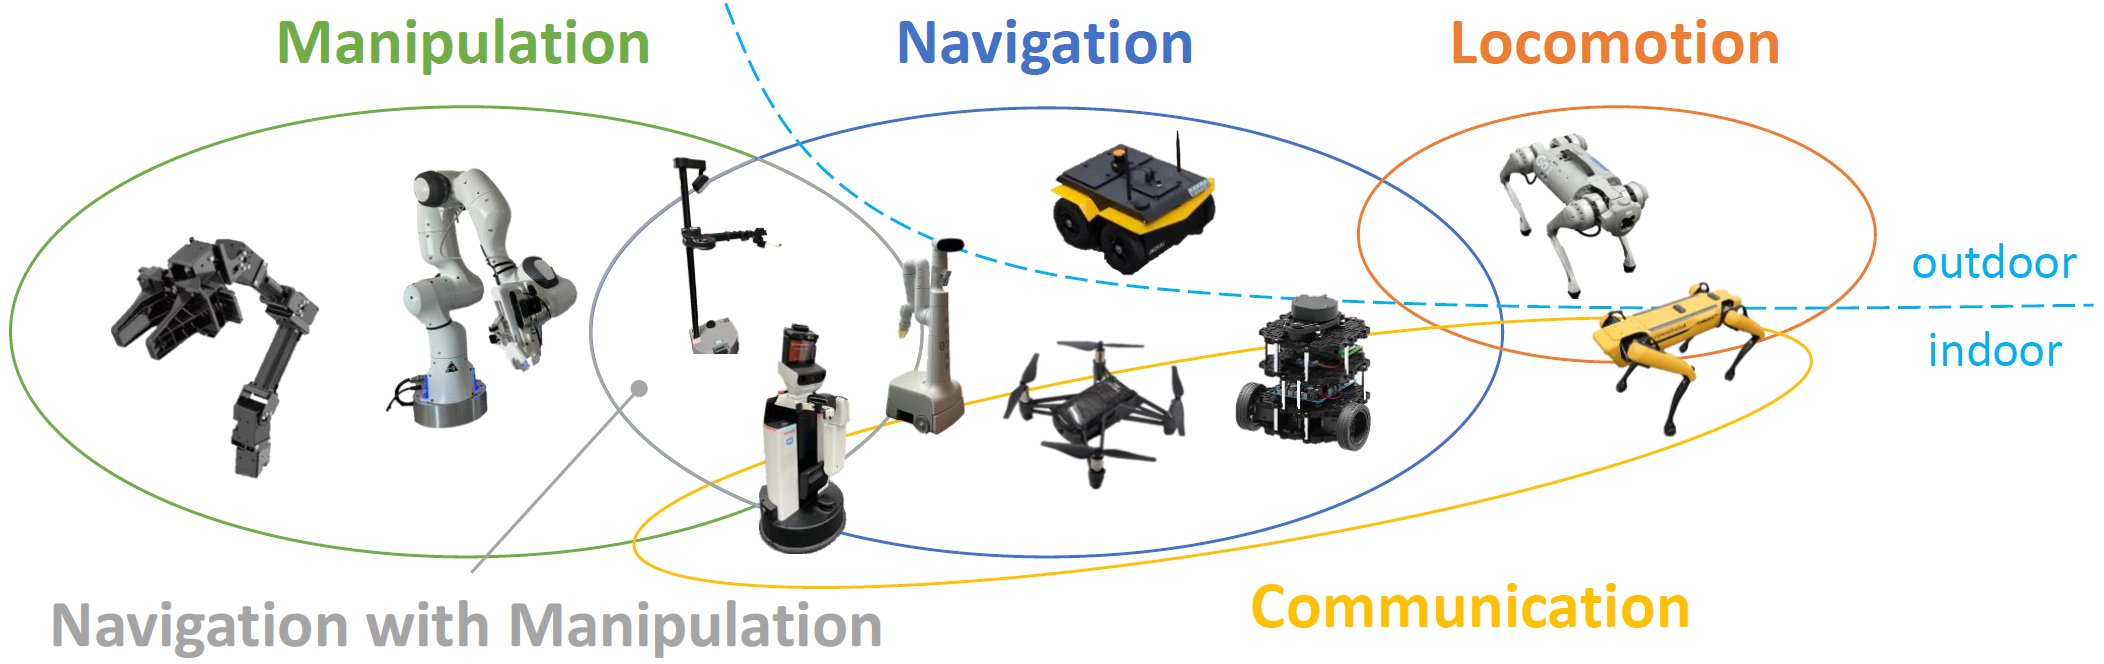
Figure 5. The overview of robots, tasks, and environments used for research with foundation models.

# Conclusion and Future Challenges
## Conclusion
The application of foundation models to robotics is an exciting and fast-changing field. In this study, we have compiled various studies regarding the real-world robot applications of foundation models. Especially, we focused on how existing robot systems can be replaced by foundational models. First, to apply foundation models to real robots, we categorized them based on the perspective of the input and output modalities and their transformations. Next, we classified these foundation models based on five aspects of their application methodology to real robots: low-level perception, high-level perception, high-level planning, low-level planning, and data augmentation. Then, we categorized the patterns of the combination of these five aspects. Following that, we summarized the construction of robotic foundation models, including actions and more, from the perspectives of model architecture, datasets, and learning objectives. Lastly, we summarized the aspects of robots, tasks, and environments that research on the real-world robot applications of foundation models covers.

Given the rapid development of this field, it is challenging to encompass all the research papers, but it allows us to observe the trends. There are several active directions in current development. One involves the practical application of existing foundational models to robot movements, with a focus on increasing the use of different modalities. Additionally, there is a trend towards constructing robotic foundational models using more extensive data and larger models. The direction also includes building foundational models that generalize across diverse body types and exploring the use of models beyond Transformers, such as Diffusion Models. Furthermore, research on low-level motion control is still relatively scarce, and there is a limited presence of robots thriving in real household and outdoor environments. Expectations for future advancements in these areas remain high. We hope that this study will serve as a guide for future utilization of foundation models.

## Future Challenges

First, we discuss the real-world robot application of existing foundation models. Various foundation models for mutual conversion between different modalities have been developed, and their application to robots is advancing. However, there are still many modalities that have not been fully utilized. Particularly, depth information, force feedback, inertial sensors, and motion information of humans, objects, and robots are not fully exploited, despite the existence of diverse examples for language, image, and sound information. Additionally, there are issues related to the granularity of skills for motion planning. The hierarchical organization of robot skills, how to structure the skill API at what level of granularity, and the addition of new skills are expected to be significant focus areas in the future.

Next, we elaborate on the robotic foundation models. While diverse robotic foundation models have been developed, their control cycles are exceptionally slow. These current models are not suitable for tasks that require fine-grained force control or collaboration with humans.

Next, we discuss practical robot applications across the entire spectrum. Through various studies, it has been observed that there are few research examples in outdoor settings, and many setups lack reflection of real-world environments, often consisting of toy problems. The use of off-the-shelf robots limits diversity. Furthermore, most setups are primarily based on position control, with few examples utilizing torque control or soft robots. It is anticipated that in the future, robots developed by various research institutions will integrate with foundation models, and there will be an increase in examples of operation in more realistic environments.

Next, the generalization ability of robots using foundation models to various environments and tasks is a future challenge. Currently, examples of applying foundation models to open-world environments, such as OVMM [223], OK-Robot [149], and GOAT [226], are increasing. We believe this direction represents a significant advancement towards new robots that go beyond the capabilities of traditional robots.

Lastly, as tasks executed through language instructions become more prevalent, quantitative evaluation of performance becomes challenging. Benchmarks such as CALVIN [227] and ARNOLD [228], which perform language instruction tasks in simulators for evaluation, have emerged. Achieving a fair evaluation in the real world, however, is not easy. Additionally, there is a need to contemplate how to evaluate interactions with humans.


仍有许多方式没有得到充分利用。特别地，尽管存在语言、图像和声音信息的各种例子，但深度信息、力反馈、惯性传感器以及人类、物体和机器人的运动信息并没有得到充分利用。此外，还存在与运动规划的技能粒度相关的问题。机器人技能的层级组织、如何以何种粒度构建技能API以及新技能的添加预计将是未来的重要重点领域。

虽然已经开发出了各种各样的机器人基础模型，但它们的控制周期异常缓慢。这些当前的模型不适合于需要细粒度的力量控制或与人类协作的任务。

可以观察到户外环境中的研究例子很少，许多环境缺乏对现实世界环境的反映，通常包括玩具问题。现成机器人的使用限制了多样性。此外，大多数设置主要基于位置控制，很少有使用扭矩控制或软机器人的例子。预计未来，各研究机构开发的机器人将与基础模型相结合，在更现实的环境中操作的例子也将增加。

基础模型应用的机器人对各种环境和任务的泛化能力是未来的挑战。目前，将基础模型应用于开放世界环境的例子越来越多，如OVMM、OK Robot和GOAT。这一方向代表着向超越传统机器人能力的新型机器人迈进的重大进展。

最后，随着通过语言指令执行的任务变得越来越普遍，对性能的定量评估变得具有挑战性。CALVIN和ARNOLD等基准已经出现，在模拟器中执行语言教学任务进行评估。然而，在现实世界中实现公正的评价并不容易。此外，还需要考虑如何评估与人类的互动。